# Generating Insights for Temporal Evaluation and Cohesion Analysis of Research Groups

## 1. Importing the libraries

In [1]:
# Importing required libraries.
import os, csv, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import networkx as nx, glob, plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from node2vec import Node2Vec
from karateclub import Graph2Vec
%matplotlib inline

In [2]:
# Defining a function to config Matplotlib.
def set_config_plt():
    sns.reset_orig()
    plt.style.use("ggplot")
    plt.rcParams.update({"figure.figsize": (9, 7), "figure.autolayout": True,
        "figure.dpi": 180, "font.size": 18, "figure.facecolor": "white",
        "axes.facecolor": "white", "axes.edgecolor": "black"})

# Configuring the Matplotlib.
set_config_plt()

In [3]:
# Creating the required directories.
os.makedirs("../data/output", exist_ok=True)

## 2. Getting and checking the information dataset

### 2.1. Isolated Metrics of Research Group

In [4]:
# Importing the data.
df_metrics_iso = pd.read_csv("../data/prepared/metrics_isolated.csv", delimiter=",", header=0)

In [5]:
# Checking some information about the data.
df_metrics_iso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22678 entries, 0 to 22677
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               22678 non-null  int64  
 1   metric_value     22678 non-null  float64
 2   metric_name      22678 non-null  object 
 3   complete_name    22678 non-null  object 
 4   h_index          22678 non-null  int64  
 5   is_permanent     22678 non-null  bool   
 6   research_line    2020 non-null   object 
 7   year             22678 non-null  int64  
 8   total_num_paper  22678 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 1.4+ MB


In [6]:
# Visualizing the first five records.
df_metrics_iso.head()

,id,metric_value,metric_name,complete_name,h_index,is_permanent,research_line,year,total_num_paper
0,7005447974,0.017045,degree,A.A.D. Medeiros,1,False,NaN,2010,76
1,26668023200,0.022727,degree,A.S. Sanca,1,False,NaN,2010,76
2,7004474343,0.221591,degree,ADAILDO GOMES D'ASSUNCAO,16,True,Telecommunication,2010,76
3,7102618949,0.170455,degree,ADRIAO DUARTE DORIA NETO,17,True,Computer Engineering,2010,76
4,55415511600,0.017045,degree,ALLAN DE MEDEIROS MARTINS,12,True,Computer Engineering,2010,76


### 2.2. Cumulative Sliding Window for Metrics of Research Group

In [7]:
# Importing the data.
df_metrics_agg = pd.read_csv("../data/prepared/metrics_cumulative.csv", delimiter=",", header=0)

In [8]:
# Checking some information about the data.
df_metrics_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92632 entries, 0 to 92631
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               92632 non-null  int64  
 1   metric_value     92632 non-null  float64
 2   metric_name      92632 non-null  object 
 3   complete_name    92632 non-null  object 
 4   h_index          92632 non-null  int64  
 5   is_permanent     92632 non-null  bool   
 6   research_line    2512 non-null   object 
 7   year             92632 non-null  int64  
 8   total_num_paper  92632 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 5.7+ MB


In [9]:
# Visualizing the first five records.
df_metrics_agg.head()

,id,metric_value,metric_name,complete_name,h_index,is_permanent,research_line,year,total_num_paper
0,7005447974,0.017045,degree,A.A.D. Medeiros,1,False,NaN,2010,76
1,26668023200,0.022727,degree,A.S. Sanca,1,False,NaN,2010,76
2,7004474343,0.221591,degree,ADAILDO GOMES D'ASSUNCAO,16,True,Telecommunication,2010,76
3,7102618949,0.170455,degree,ADRIAO DUARTE DORIA NETO,17,True,Computer Engineering,2010,76
4,55415511600,0.017045,degree,ALLAN DE MEDEIROS MARTINS,12,True,Computer Engineering,2010,76


### 2.3. Cumulative Metrics of Research Group with 4-window

In [10]:
# Importing the data.
df_metrics_4_window = pd.read_csv("../data/prepared/metrics_cumulative_4_window.csv", delimiter=",", header=0)

In [11]:
# Checking some information about the data.
df_metrics_4_window.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62192 entries, 0 to 62191
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               62192 non-null  int64  
 1   metric_value     62192 non-null  float64
 2   metric_name      62192 non-null  object 
 3   complete_name    62192 non-null  object 
 4   h_index          62192 non-null  int64  
 5   is_permanent     62192 non-null  bool   
 6   research_line    2492 non-null   object 
 7   year             62192 non-null  int64  
 8   total_num_paper  62192 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.9+ MB


In [12]:
# Visualizing the first five records.
df_metrics_4_window.head()

,id,metric_value,metric_name,complete_name,h_index,is_permanent,research_line,year,total_num_paper
0,7005447974,0.017045,degree,A.A.D. Medeiros,1,False,NaN,2010,76
1,26668023200,0.022727,degree,A.S. Sanca,1,False,NaN,2010,76
2,7004474343,0.221591,degree,ADAILDO GOMES D'ASSUNCAO,16,True,Telecommunication,2010,76
3,7102618949,0.170455,degree,ADRIAO DUARTE DORIA NETO,17,True,Computer Engineering,2010,76
4,55415511600,0.017045,degree,ALLAN DE MEDEIROS MARTINS,12,True,Computer Engineering,2010,76


### 2.4. Cumulative Metrics of Research Group with 2-window

In [13]:
# Importing the data.
df_metrics_2_window = pd.read_csv("../data/prepared/metrics_cumulative_2_window.csv", delimiter=",", header=0)

In [14]:
# Checking some information about the data.
df_metrics_2_window.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39658 entries, 0 to 39657
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               39658 non-null  int64  
 1   metric_value     39658 non-null  float64
 2   metric_name      39658 non-null  object 
 3   complete_name    39658 non-null  object 
 4   h_index          39658 non-null  int64  
 5   is_permanent     39658 non-null  bool   
 6   research_line    2366 non-null   object 
 7   year             39658 non-null  int64  
 8   total_num_paper  39658 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 2.5+ MB


In [15]:
# Visualizing the first five records.
df_metrics_2_window.head()

,id,metric_value,metric_name,complete_name,h_index,is_permanent,research_line,year,total_num_paper
0,7005447974,0.017045,degree,A.A.D. Medeiros,1,False,NaN,2010,76
1,26668023200,0.022727,degree,A.S. Sanca,1,False,NaN,2010,76
2,7004474343,0.221591,degree,ADAILDO GOMES D'ASSUNCAO,16,True,Telecommunication,2010,76
3,7102618949,0.170455,degree,ADRIAO DUARTE DORIA NETO,17,True,Computer Engineering,2010,76
4,55415511600,0.017045,degree,ALLAN DE MEDEIROS MARTINS,12,True,Computer Engineering,2010,76


### 2.5. Members' Isolated Metrics

In [16]:
# Getting the data.
df_members_iso = df_metrics_iso[df_metrics_iso.is_permanent == True]

In [17]:
# Visualizing the information about the data.
df_members_iso.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2020 entries, 2 to 22660
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2020 non-null   int64  
 1   metric_value     2020 non-null   float64
 2   metric_name      2020 non-null   object 
 3   complete_name    2020 non-null   object 
 4   h_index          2020 non-null   int64  
 5   is_permanent     2020 non-null   bool   
 6   research_line    2020 non-null   object 
 7   year             2020 non-null   int64  
 8   total_num_paper  2020 non-null   int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 144.0+ KB


In [18]:
# Visualizing the first five records.
df_members_iso.head()

,id,metric_value,metric_name,complete_name,h_index,is_permanent,research_line,year,total_num_paper
2,7004474343,0.221591,degree,ADAILDO GOMES D'ASSUNCAO,16,True,Telecommunication,2010,76
3,7102618949,0.170455,degree,ADRIAO DUARTE DORIA NETO,17,True,Computer Engineering,2010,76
4,55415511600,0.017045,degree,ALLAN DE MEDEIROS MARTINS,12,True,Computer Engineering,2010,76
5,7102422753,0.039773,degree,ANDRES ORTIZ SALAZAR,9,True,Automation and Systems,2010,76
6,57188958500,0.068182,degree,ANDRÉ LAURINDO MAITELLI,9,True,Automation and Systems,2010,76


### 2.6. Members' Metrics for Cumulative Sliding Window

In [19]:
# Getting the data.
df_members_agg = df_metrics_agg[df_metrics_agg.is_permanent == True]

In [20]:
# Visualizing the information about the data.
df_members_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2512 entries, 2 to 92584
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2512 non-null   int64  
 1   metric_value     2512 non-null   float64
 2   metric_name      2512 non-null   object 
 3   complete_name    2512 non-null   object 
 4   h_index          2512 non-null   int64  
 5   is_permanent     2512 non-null   bool   
 6   research_line    2512 non-null   object 
 7   year             2512 non-null   int64  
 8   total_num_paper  2512 non-null   int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 179.1+ KB


In [21]:
# Visualizing the first five records.
df_members_agg.head()

,id,metric_value,metric_name,complete_name,h_index,is_permanent,research_line,year,total_num_paper
2,7004474343,0.221591,degree,ADAILDO GOMES D'ASSUNCAO,16,True,Telecommunication,2010,76
3,7102618949,0.170455,degree,ADRIAO DUARTE DORIA NETO,17,True,Computer Engineering,2010,76
4,55415511600,0.017045,degree,ALLAN DE MEDEIROS MARTINS,12,True,Computer Engineering,2010,76
5,7102422753,0.039773,degree,ANDRES ORTIZ SALAZAR,9,True,Automation and Systems,2010,76
6,57188958500,0.068182,degree,ANDRÉ LAURINDO MAITELLI,9,True,Automation and Systems,2010,76


### 2.7. Members' 4-window Metrics

In [22]:
# Getting the data.
df_members_4_window = df_metrics_4_window[df_metrics_4_window.is_permanent == True]

In [23]:
# Visualizing the information about the data.
df_members_4_window.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2492 entries, 2 to 62130
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2492 non-null   int64  
 1   metric_value     2492 non-null   float64
 2   metric_name      2492 non-null   object 
 3   complete_name    2492 non-null   object 
 4   h_index          2492 non-null   int64  
 5   is_permanent     2492 non-null   bool   
 6   research_line    2492 non-null   object 
 7   year             2492 non-null   int64  
 8   total_num_paper  2492 non-null   int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 177.7+ KB


In [24]:
# Visualizing the first five records.
df_members_4_window.head()

,id,metric_value,metric_name,complete_name,h_index,is_permanent,research_line,year,total_num_paper
2,7004474343,0.221591,degree,ADAILDO GOMES D'ASSUNCAO,16,True,Telecommunication,2010,76
3,7102618949,0.170455,degree,ADRIAO DUARTE DORIA NETO,17,True,Computer Engineering,2010,76
4,55415511600,0.017045,degree,ALLAN DE MEDEIROS MARTINS,12,True,Computer Engineering,2010,76
5,7102422753,0.039773,degree,ANDRES ORTIZ SALAZAR,9,True,Automation and Systems,2010,76
6,57188958500,0.068182,degree,ANDRÉ LAURINDO MAITELLI,9,True,Automation and Systems,2010,76


### 2.8. Members' 2-window Metrics

In [25]:
# Getting the data.
df_members_2_window = df_metrics_2_window[df_metrics_2_window.is_permanent == True]

In [26]:
# Visualizing the information about the data.
df_members_2_window.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2366 entries, 2 to 39633
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2366 non-null   int64  
 1   metric_value     2366 non-null   float64
 2   metric_name      2366 non-null   object 
 3   complete_name    2366 non-null   object 
 4   h_index          2366 non-null   int64  
 5   is_permanent     2366 non-null   bool   
 6   research_line    2366 non-null   object 
 7   year             2366 non-null   int64  
 8   total_num_paper  2366 non-null   int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 168.7+ KB


In [27]:
# Visualizing the first five records.
df_members_2_window.head()

,id,metric_value,metric_name,complete_name,h_index,is_permanent,research_line,year,total_num_paper
2,7004474343,0.221591,degree,ADAILDO GOMES D'ASSUNCAO,16,True,Telecommunication,2010,76
3,7102618949,0.170455,degree,ADRIAO DUARTE DORIA NETO,17,True,Computer Engineering,2010,76
4,55415511600,0.017045,degree,ALLAN DE MEDEIROS MARTINS,12,True,Computer Engineering,2010,76
5,7102422753,0.039773,degree,ANDRES ORTIZ SALAZAR,9,True,Automation and Systems,2010,76
6,57188958500,0.068182,degree,ANDRÉ LAURINDO MAITELLI,9,True,Automation and Systems,2010,76


### 2.9. Research Group's Production data

In [28]:
# Importing the data.
df_data = pd.read_csv("../data/prepared/production_members_final.csv", index_col=False, header=0, dtype=object)

In [29]:
# Visualizing the information about the data.
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   members_name   1249 non-null   object
 1   id             1249 non-null   object
 2   title          1249 non-null   object
 3   abstract       1226 non-null   object
 4   citation_num   1249 non-null   object
 5   auth_keywords  1006 non-null   object
 6   index_terms    1123 non-null   object
 7   vehicle_name   1249 non-null   object
 8   affiliations   1243 non-null   object
 9   subject_areas  1249 non-null   object
 10  authors        1249 non-null   object
 11  author_affil   1245 non-null   object
 12  year           1249 non-null   object
 13  month          1249 non-null   object
 14  ref_count      1221 non-null   object
 15  references     1221 non-null   object
dtypes: object(16)
memory usage: 156.2+ KB


In [30]:
# Visualizing the first five records.
df_data.head()

,members_name,id,title,abstract,citation_num,auth_keywords,index_terms,vehicle_name,affiliations,subject_areas,authors,author_affil,year,month,ref_count,references
0,"('ANDRÉ LAURINDO MAITELLI',)",84943546553,Multiple model SPGPC for blood pressure control,Multiple model adaptive control procedures hav...,2,"('Blood pressure control', 'Multi-model', 'Pre...","('Feedback systems', 'Function parameters', 'M...",ICINCO 2015 - 12th International Conference on...,"({'id': '60069354', 'affiliation': 'Instituto ...","({'area': 'Information Systems', 'code': '1710...","({'id': '16424469200', 'name': 'Celina P. Leão...","({'id': '56895663100', 'name': 'Humberto A. Si...",2015,1,14.0,"({'id': '85088356350', 'title': None, 'doi': N..."
1,"('ANDRÉ LAURINDO MAITELLI', 'FABIO MENEGHETTI ...",84923842632,A Modified Matricial PSO Algorithm Applied to ...,"© 2014, Brazilian Society for Automatics--SBA....",5,"('Convergence analysis', 'Evolutionary computa...","('Almost sure convergence', 'Conventional iden...","Journal of Control, Automation and Electrical ...","({'id': '60023857', 'affiliation': 'Universida...","({'area': 'Control and Systems Engineering', '...","({'id': '35316777100', 'name': 'Fabio Meneghet...","({'id': '57203395728', 'name': 'Andre Felipe O...",2015,4,25.0,"({'id': '34548017133', 'title': None, 'doi': N..."
2,"('ANDRÉ LAURINDO MAITELLI',)",85105484753,Unknown Input Observer-based Actuator and Sens...,"© 2021, ICROS, KIEE and Springer.This paper pr...",6,"('Discrete time Takagi Sugeno fuzzy system', '...","('Actuator and sensor faults', 'Decoupling pro...","International Journal of Control, Automation a...","({'id': '60023857', 'affiliation': 'Universida...","({'area': 'Control and Systems Engineering', '...","({'id': '6602549353', 'name': 'André L. Maitel...","({'id': '57189226611', 'name': 'Emanoel R. Q. ...",2021,7,22.0,"({'id': '85105474967', 'title': 'Actuator faul..."
3,"('ANDRÉ LAURINDO MAITELLI',)",85114596194,Constrained explicit GPC formulation analysis ...,"© 2021, The Author(s), under exclusive licence...",0,"('CARIMA', 'Constrained systems', 'Industrial ...","('Computational time', 'Gantry crane systems',...",International Journal of Dynamics and Control,"({'id': '127586424', 'affiliation': 'Graduate ...","({'area': 'Control and Systems Engineering', '...","({'id': '6602549353', 'name': 'André Laurindo ...","({'id': '6602549353', 'name': 'André Laurindo ...",2022,8,38.0,"({'id': '34547520355', 'title': None, 'doi': N..."
4,"('ANDRÉ LAURINDO MAITELLI',)",85075750586,Maximum Power Point Tracking through Magic Squ...,© 2019 IEEE.Modules in a photovoltaic arrangem...,0,"('Adaptive Perturb and Observe Method', 'parti...","('Adaptive perturb and observe', 'Magic square...",2019 IEEE PES Conference on Innovative Smart G...,"({'id': '60023857', 'affiliation': 'Universida...",({'area': 'Electrical and Electronic Engineeri...,"({'id': '6602549353', 'name': 'André Laurindo ...","({'id': '57212018710', 'name': 'Andrew Viníciu...",2019,9,18.0,"({'id': '85020251687', 'title': 'Seven indicat..."


### 2.10. Researchers' Stats and Data

In [31]:
# Importing the data.
df_members = pd.read_csv("../data/prepared/members_stats_final.csv", index_col=False, header=0)

In [32]:
# Visualizing the information about the data.
df_members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   complete_name        33 non-null     object
 1   identifiers          33 non-null     object
 2   h_index              33 non-null     int64 
 3   is_permanent         33 non-null     bool  
 4   research_line        26 non-null     object
 5   subject_areas        33 non-null     object
 6   citation_count       33 non-null     int64 
 7   document_count       33 non-null     int64 
 8   coauthor_count       33 non-null     int64 
 9   affiliation_current  33 non-null     object
 10  affiliation_history  33 non-null     object
dtypes: bool(1), int64(4), object(6)
memory usage: 2.7+ KB


In [33]:
# Visualizing the first five records.
df_members.head()

,complete_name,identifiers,h_index,is_permanent,research_line,subject_areas,citation_count,document_count,coauthor_count,affiliation_current,affiliation_history
0,ANDRÉ LAURINDO MAITELLI,"['57188958500', '6602549353']",9,True,Automation and Systems,"({'area': 'Safety, Risk, Reliability and Quali...",228,67,104,"({'id': '104204807', 'affiliation': 'Departmen...","({'id': 60023857, 'affiliation': 'Universidade..."
1,ANDRES ORTIZ SALAZAR,['7102422753'],9,True,Automation and Systems,"({'area': 'Safety, Risk, Reliability and Quali...",373,98,151,"({'id': '104204807', 'affiliation': 'Departmen...","({'id': 60159500, 'affiliation': 'Northern New..."
2,CARLOS EDUARDO TRABUCO DOREA,['7004096252'],12,True,Automation and Systems,"({'area': 'Safety, Risk, Reliability and Quali...",620,68,75,"({'id': '104204823', 'affiliation': 'Departame...","({'id': 60023857, 'affiliation': 'Universidade..."
3,DIOMADSON RODRIGUES BELFORT,"['24775112000', '57214364356']",4,True,Automation and Systems,"({'area': 'Signal Processing', 'code': '1711',...",39,19,40,"({'id': '60023857', 'affiliation': 'Universida...","({'id': '60112307', 'affiliation': ""Laboratoir..."
4,FABIO MENEGHETTI UGULINO DE ARAUJO,"['35316777100', '36655735300', '7004017586', '...",8,True,Automation and Systems,"({'area': 'Mathematics (all)', 'code': '2600',...",222,31,48,"({'id': '60023857', 'affiliation': 'Universida...","({'id': 60023857, 'affiliation': 'Universidade..."


### 2.11. Research Group's Temporal Nets

In [34]:
# Getting the data.
net_isolated = sorted(glob.glob("../data/networks/*network.gexf"))
net_cumulative = sorted(glob.glob("../data/networks/*network_cumulative.gexf"))
net_4_window = sorted(glob.glob("../data/networks/*network_cumulative_4_window.gexf"))
net_2_window = sorted(glob.glob("../data/networks/*network_cumulative_2_window.gexf"))

## 3. Cleaning the dataframes

In [35]:
# Changing the invalid values to "None".
df_metrics_iso.replace({np.nan: None}, inplace=True)
df_metrics_agg.replace({np.nan: None}, inplace=True)
df_metrics_4_window.replace({np.nan: None}, inplace=True)
df_metrics_2_window.replace({np.nan: None}, inplace=True)
df_members_iso.replace({np.nan: None}, inplace=True)
df_members_agg.replace({np.nan: None}, inplace=True)
df_members_4_window.replace({np.nan: None}, inplace=True)
df_members_2_window.replace({np.nan: None}, inplace=True)
df_data.replace({np.nan: None}, inplace=True)
df_members.replace({np.nan: None}, inplace=True)

/var/folders/rw/l23875p122d28r1l_lz4_wyw0000gn/T/ipykernel_2980/3665750526.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_members_iso.replace({np.nan: None}, inplace=True)
/var/folders/rw/l23875p122d28r1l_lz4_wyw0000gn/T/ipykernel_2980/3665750526.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_members_agg.replace({np.nan: None}, inplace=True)
/var/folders/rw/l23875p122d28r1l_lz4_wyw0000gn/T/ipykernel_2980/3665750526.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [36]:
# Reading each network.
net_isolated = dict(zip(sorted(df_metrics_iso.year.unique()),
                        [nx.read_gexf(graph) for graph in net_isolated]))
net_cumulative = dict(zip(sorted(df_metrics_iso.year.unique()),
                          [nx.read_gexf(graph) for graph in net_cumulative]))
net_4_window = dict(zip(sorted(df_metrics_iso.year.unique()),
                      [nx.read_gexf(graph) for graph in net_4_window]))
net_2_window = dict(zip(sorted(df_metrics_iso.year.unique()),
                      [nx.read_gexf(graph) for graph in net_2_window]))

In [37]:
# Removing unnecessary columns.
columns = ["id", "h_index", "is_permanent", "research_line"]
df_members_iso.drop(columns=columns, inplace=True)
df_members_agg.drop(columns=columns, inplace=True)
df_members_4_window.drop(columns=columns, inplace=True)
df_members_2_window.drop(columns=columns, inplace=True)

/var/folders/rw/l23875p122d28r1l_lz4_wyw0000gn/T/ipykernel_2980/1345532163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_members_iso.drop(columns=columns, inplace=True)
/var/folders/rw/l23875p122d28r1l_lz4_wyw0000gn/T/ipykernel_2980/1345532163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_members_agg.drop(columns=columns, inplace=True)
/var/folders/rw/l23875p122d28r1l_lz4_wyw0000gn/T/ipykernel_2980/1345532163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [38]:
# Aggregating the data.
columns_agg = {"metric_value": "mean", "total_num_paper": "first"}
columns = ["metric_name", "complete_name", "year"]
df_members_iso = df_members_iso.groupby(columns).agg(columns_agg).reset_index().rename(
    columns={"complete_name": "researcher"})
df_members_agg = df_members_agg.groupby(columns).agg(columns_agg).reset_index().rename(
    columns={"complete_name": "researcher"})
df_members_4_window = df_members_4_window.groupby(columns).agg(columns_agg).reset_index().rename(
    columns={"complete_name": "researcher"})
df_members_2_window = df_members_2_window.groupby(columns).agg(columns_agg).reset_index().rename(
    columns={"complete_name": "researcher"})

In [39]:
# Changing the type of numeric columns.
df_data.year = df_data.year.apply(lambda x: int(x) if not pd.isnull(x) else None)
df_data.citation_num = df_data.citation_num.apply(lambda x: int(x) if not pd.isnull(x) else None)
df_data.month = df_data.month.apply(lambda x: int(x) if not pd.isnull(x) else None)
df_data.ref_count = df_data.ref_count.apply(lambda x: int(float(x)) if not pd.isnull(x) else None)

In [40]:
# Converting from the "str" type to the "list" type of some columns of data.
df_data.members_name = df_data.members_name.apply(lambda x: eval(x) if x else None)
df_data.auth_keywords = df_data.auth_keywords.apply(lambda x: eval(x) if x else None)
df_data.index_terms = df_data.index_terms.apply(lambda x: eval(x) if x else None)
df_data.affiliations = df_data.affiliations.apply(lambda x: eval(x) if x else None)
df_data.subject_areas = df_data.subject_areas.apply(lambda x: eval(x) if x else None)
df_data.authors = df_data.authors.apply(lambda x: eval(x) if x else None)
df_data.author_affil = df_data.author_affil.apply(lambda x: eval(x) if x else None)
df_data.references = df_data.references.apply(lambda x: eval(x) if x else None)

In [41]:
# Defining the number of articles per year for each researcher.
df_members_iso.loc[:, "num_paper"] = df_members_iso[["researcher", "year"]].apply(lambda row: df_data[
    (df_data.year == row.year) &
    ([row.researcher in members for members in df_data.members_name])].id.size, axis=1)
df_members_agg.loc[:, "num_paper"] = df_members_agg[["researcher", "year"]].apply(lambda row: df_data[
    (df_data.year <= row.year) &
    ([row.researcher in members for members in df_data.members_name])].id.size, axis=1)
df_members_4_window.loc[:, "num_paper"] = df_members_4_window[["researcher", "year"]].apply(lambda row: df_data[
    (df_data.year >= row.year - 3) & (df_data.year <= row.year) &
    ([row.researcher in members for members in df_data.members_name])].id.size, axis=1)
df_members_2_window.loc[:, "num_paper"] = df_members_2_window[["researcher", "year"]].apply(lambda row: df_data[
    (df_data.year >= row.year - 1) & (df_data.year <= row.year) &
    ([row.researcher in members for members in df_data.members_name])].id.size, axis=1)

In [42]:
# Creating the feature "percentual_num_paper".
df_members_iso["percentual_num_paper"] = (df_members_iso["num_paper"] / df_members_iso["total_num_paper"]) * 100
df_members_agg["percentual_num_paper"] = (df_members_agg["num_paper"] / df_members_agg["total_num_paper"]) * 100
df_members_4_window["percentual_num_paper"] = (df_members_4_window["num_paper"] / df_members_4_window["total_num_paper"]) * 100
df_members_2_window["percentual_num_paper"] = (df_members_2_window["num_paper"] / df_members_2_window["total_num_paper"]) * 100

In [43]:
# Converting from the "str" type to the "list" type of some columns of data.
df_members.identifiers = df_members.identifiers.apply(lambda x: eval(x) if x else None)
df_members.subject_areas = df_members.subject_areas.apply(lambda x: eval(x) if x else None)
df_members.affiliation_current = df_members.affiliation_current.apply(lambda x: eval(x) if x else None)
df_members.affiliation_history = df_members.affiliation_history.apply(lambda x: eval(x) if x else None)

## 4. Utils functions

### 4.1. Visualization methods

In [44]:
def plot_single_line_chart(x_values, y_values, x_label, y_label, title, name_fig=None, pos_vline=None, text_vline=None):
    fig, ax = plt.subplots()
    ax.plot(x_values, y_values, marker="o")
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticks(x_values)
    if pos_vline:
        ax.axvline(pos_vline, ymax=0.92, color="#400000", linewidth=4)
        ax.text(pos_vline + 0.1, y_values[pos_vline - 1] + 0.1, text_vline, color="black")
    ax.set_ylim([0, max(y_values) * 1.1])
    fig.tight_layout()
    if name_fig:
        plt.savefig(name_fig)
    plt.show()    

In [45]:
def plot_multiple_line_chart(dataframe, x_value, y_values, y_labels, title, xaxis_label, yaxis_label,
                             title_legend=None, name_fig=None, y_is_int=False, external_legend=True,
                             has_legend=True):
    fig, ax = plt.subplots()
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xaxis_label)
    ax.set_ylabel(yaxis_label)
    for idx in range(len(y_values)):
        ax.plot(dataframe[x_value], dataframe[y_values[idx]], marker="o", label=y_labels[idx])
    ax.set_xticks(dataframe[x_value])
    ax.set_xticklabels(ax.get_xticks(), rotation = 45)
    if y_is_int:
        ax.set_yticks([item for item in np.arange(0, dataframe[y_values].max().max() + 1, 2)])
    else:
        ax.set_yticks([float("{:.3f}".format(item)) for item in np.linspace(0, dataframe[y_values].max().max(), 10)])
    ax.set_ylim([0, dataframe[y_values].max().max() * 1.1])
    plt.axvspan(2019, 2021, color='gray', alpha=0.3)
    if has_legend:
        ax.legend(title=title_legend, fontsize="medium")
    if external_legend and has_legend:
        plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    fig.tight_layout()
    if name_fig:
        plt.savefig(name_fig)
    plt.show()

In [46]:
def plot_multiple_line_chart_sns(dataframe, x_value, y_value, y_value_style, title, xaxis_label, yaxis_label,
                                 y_lim_max=1, has_error=False, has_legend=True, title_legend=None, labels_legend=None,
                                 external_legend=False, highlight_pandemic=True, name_fig=None):

    colors = ["#0e77ab","#39c8c6","#e16670","#7d2b32","#e6c7ca",
              "#9b5de5","#f15bb5","#fee440","#00bbf9","#00f5d4", "#a9bac7",
              "#a3cef1","#8b8c89", "#ff9770","#ffd670","#adcc00", "#f992ad",
              "#fab4c8","#f8a0d6","#d4b0f9", "#1c3144"][:dataframe[y_value_style].unique().size]

    ax = sns.lineplot(data=dataframe, x=x_value, y=y_value, hue=y_value_style, style=y_value_style, markers=True,
                      legend="auto" if has_legend else has_legend, ci="sd" if has_error else None,
                      palette=colors)
    ax.set_title(title, fontsize=16)
    ax.set_ylabel(yaxis_label)
    ax.set_ylim([0, y_lim_max])
    ax.set_xlabel(xaxis_label)
    ax.set_xticks(sorted(dataframe[x_value].unique()))
    ax.set_xticklabels(ax.get_xticks(), rotation = 45)
    if highlight_pandemic:
        plt.axvspan(2019, 2021, color="gray", alpha=0.2)
    if external_legend and has_legend:
        plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize="medium")
    if title_legend and has_legend:
        ax.get_legend().set_title(title_legend)
    if labels_legend and has_legend:
        for t, l in zip(ax.get_legend().texts, labels_legend):
            t.set_text(l)
    plt.tight_layout()
    if name_fig:
        plt.savefig(name_fig)
    plt.show()

In [47]:
def plot_clusters(dataframe, x_value, y_value, class_value, size_value, label_value, x_label, y_label, title, num_bins=5,
                  space_legend=2, name_fig=None):
    pallete = ['#4198B7', '#39C8C6', '#D3500C', '#FFB139',
               '#0E77AB', '#1E3544', '#041434', '#12B5C4',
               '#630C3A']
    fig, ax = plt.subplots(figsize=(12,7))
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    sc = ax.scatter(dataframe[x_value], dataframe[y_value], s=dataframe[size_value] * 10,
                    c=dataframe[class_value].apply(lambda x: pallete[int(x)]))
    for idx, record in dataframe.iterrows():
        ax.annotate(record[label_value], (record[x_value], record[y_value]),
                    xytext=(0, 1), textcoords="offset points", ha="center", va="center", fontsize=13)
    handles, labels = sc.legend_elements(prop="sizes", alpha=0.5, num=num_bins)
    labels = np.linspace(dataframe[size_value].min(), dataframe[size_value].max(), num_bins, dtype=int)
    ax.legend(handles, labels, title="Nº. of Manuscripts", fontsize="small",
              title_fontsize="medium", loc='center left', bbox_to_anchor=(1, 0.5),
              borderpad=1, handletextpad=2, labelspacing=space_legend, frameon=False)
    fig.tight_layout()
    if name_fig:
        plt.savefig(name_fig)
    plt.show()

In [48]:
def plot_overlapping_kdes(dataframe, x_value, hue_value, x_label, xlim=None, name_fig=None):
    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    # Initializing the FacetGrid object.
    pal = sns.cubehelix_palette(13, rot=-.25, light=.7)
    ax = sns.FacetGrid(dataframe, row=hue_value, hue=hue_value, aspect=15, height=.5, palette=pal)

    # Drawing the densities in a few steps.
    ax.map(sns.kdeplot, x_value, bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    ax.map(sns.kdeplot, x_value, clip_on=False, color="w", lw=2, bw_adjust=.5)

    # Passing color=None to refline() uses the hue mapping.
    ax.refline(y=0, linewidth=1, linestyle="-", color=None, clip_on=False)

    # Defining and using a simple function to label the plot in axes coordinates.
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)
    ax.map(label, x_value)

    # Setting the subplots to overlap.
    ax.figure.subplots_adjust(hspace=-.25)

    # Removing axes details that don't play well with overlap.
    ax.set_titles("")
    ax.set(yticks=[], ylabel="")
    ax.despine(bottom=True, left=True)
    ax.set_xlabels("")
    ax.set(xlim=(None, xlim))
    if name_fig:
        plt.savefig(name_fig)
    plt.show()

In [49]:
def plot_confusion_matrix(y_real, y_pred, name_fig=None):
    ConfusionMatrixDisplay.from_predictions(y_real, y_pred, colorbar=False)
    if name_fig:
        plt.savefig(name_fig)
    plt.show()

### 4.2. Clustering Methods

In [50]:
# Defining the function to cluster the data.
def clustering_kmeans(dataframe, n_clusters):
    # Preprocessing the data.
    ss = StandardScaler()
    X = ss.fit_transform(dataframe)

    # Training the model and clustering the data.
    model = KMeans(n_clusters=n_clusters, random_state=42)
    model.fit(X)
    y_pred = model.predict(X)

    return y_pred

In [51]:
# Defining the Elbow method.
def elbow_method(dataframe, max_k):
    # Preprocessing the data.
    ss = StandardScaler()
    X = ss.fit_transform(dataframe)

    sse = dict()
    for k in range(1, max_k + 1):
        temp = pd.DataFrame(data=X, columns=dataframe.columns.tolist())
        sse[k] = pd.Series([0] * temp.columns.size, index=temp.columns)
        model = KMeans(n_clusters=k, random_state=42)
        model.fit(X)
        temp["label"] = model.predict(X)
        for c in range(k):
            sse[k] += np.sum(np.power(
              temp.iloc[[c == cluster for cluster in temp.label], :-1] - model.cluster_centers_[c], 2))
        sse[k] = sse[k].sum()
    return pd.Series(sse)

In [52]:
# Function to generate a net with the cluster of each node.
def generate_net_cluster(graph, dataframe, name_file):
    G = nx.Graph(graph)
    attrs = {row.id: {"cluster": row.cluster,
                      "num_paper": row.num_paper,
                      "id_alt": row.id_alt,
                      "pred_rl": row.pred_rl}
             for row in dataframe.itertuples()}
    nx.set_node_attributes(G, attrs)
    nx.write_gexf(G, name_file)

In [53]:
# Function to discretize the research line for each member.
def discretize_research_line(research_line):
    if research_line == "Automation and Systems":
        return 1
    elif research_line == "Computer Engineering":
        return 2
    elif research_line == "Telecommunication":
        return 3
    else:
        return None

In [54]:
# Function to define the research line from the cluster.
def set_research_line_from_cluster(dataframe, num_members_per_line):
    dataframe["pred_rl"] = None
    for c in sorted(dataframe.cluster.unique()):
        temp = dataframe.real_rl[dataframe.cluster == c].value_counts()
        temp = temp / num_members_per_line[temp.index.tolist()]
        main_line = temp[temp == temp.max()].index.tolist()
        if len(main_line) == 1:
            dataframe.loc[dataframe.cluster == c, "pred_rl"] = main_line[0]
        elif len(main_line) > 1:
            temp = dataframe.loc[
                (dataframe.cluster == c) & (dataframe.real_rl.isin(main_line)),
                ["num_paper", "real_rl"]
            ].groupby("real_rl").num_paper.sum().sort_values(ascending=False)
            dataframe.loc[dataframe.cluster == c, "pred_rl"] = temp.index.tolist()[0]
    dataframe["pred_rl"] = dataframe["pred_rl"].astype(np.int32)
    dataframe["pred_rl"] = dataframe["pred_rl"].astype("category")
    return dataframe.pred_rl.copy()

### 4.3. Embedding Methods

In [55]:
# Function to create the embedding vector from a graph.
def get_vector_from_graph(graph, num_dimension=2, num_window=10):
    node2vec = Node2Vec(graph, dimensions=num_dimension)
    model = node2vec.fit(window=num_window)
    data = []
    for node in graph.nodes(data=True):
        vector = model.wv.get_vector(str(node[0]))
        vector = {"column_{}".format(n + 1): vector[n] for n in range(num_dimension)}
        data.append({**node[1], **vector})
    return pd.DataFrame(data).rename(columns={"label": "id_scopus"})

In [56]:
# Function to create the embedding vectors from a list of graph.
def get_graph_embedding(graphs, num_dimension=2):
    graphs = {k: nx.convert_node_labels_to_integers(G) for k, G in graphs.items()}
    model = Graph2Vec(dimensions=num_dimension)
    model.fit(list(graphs.values()))
    embeddings = model.get_embedding()
    data = pd.DataFrame(columns=["year", *["column_{}".format(n + 1) for n in range(num_dimension)]])
    data["year"] = list(graphs.keys())
    data.iloc[:, -2:] = embeddings
    return data

## 5. Exploratory Data Analysis

### 5.1. Research Group's Analysis

#### 5.1.1. Evaluation of Reseach Group by Metrics' Temporal Analysis

In [57]:
# Getting the data.
df = df_metrics_iso[df_metrics_iso.metric_name.isin(
    ["degree", "betweenness", "eigenvector", "closeness"])].copy()

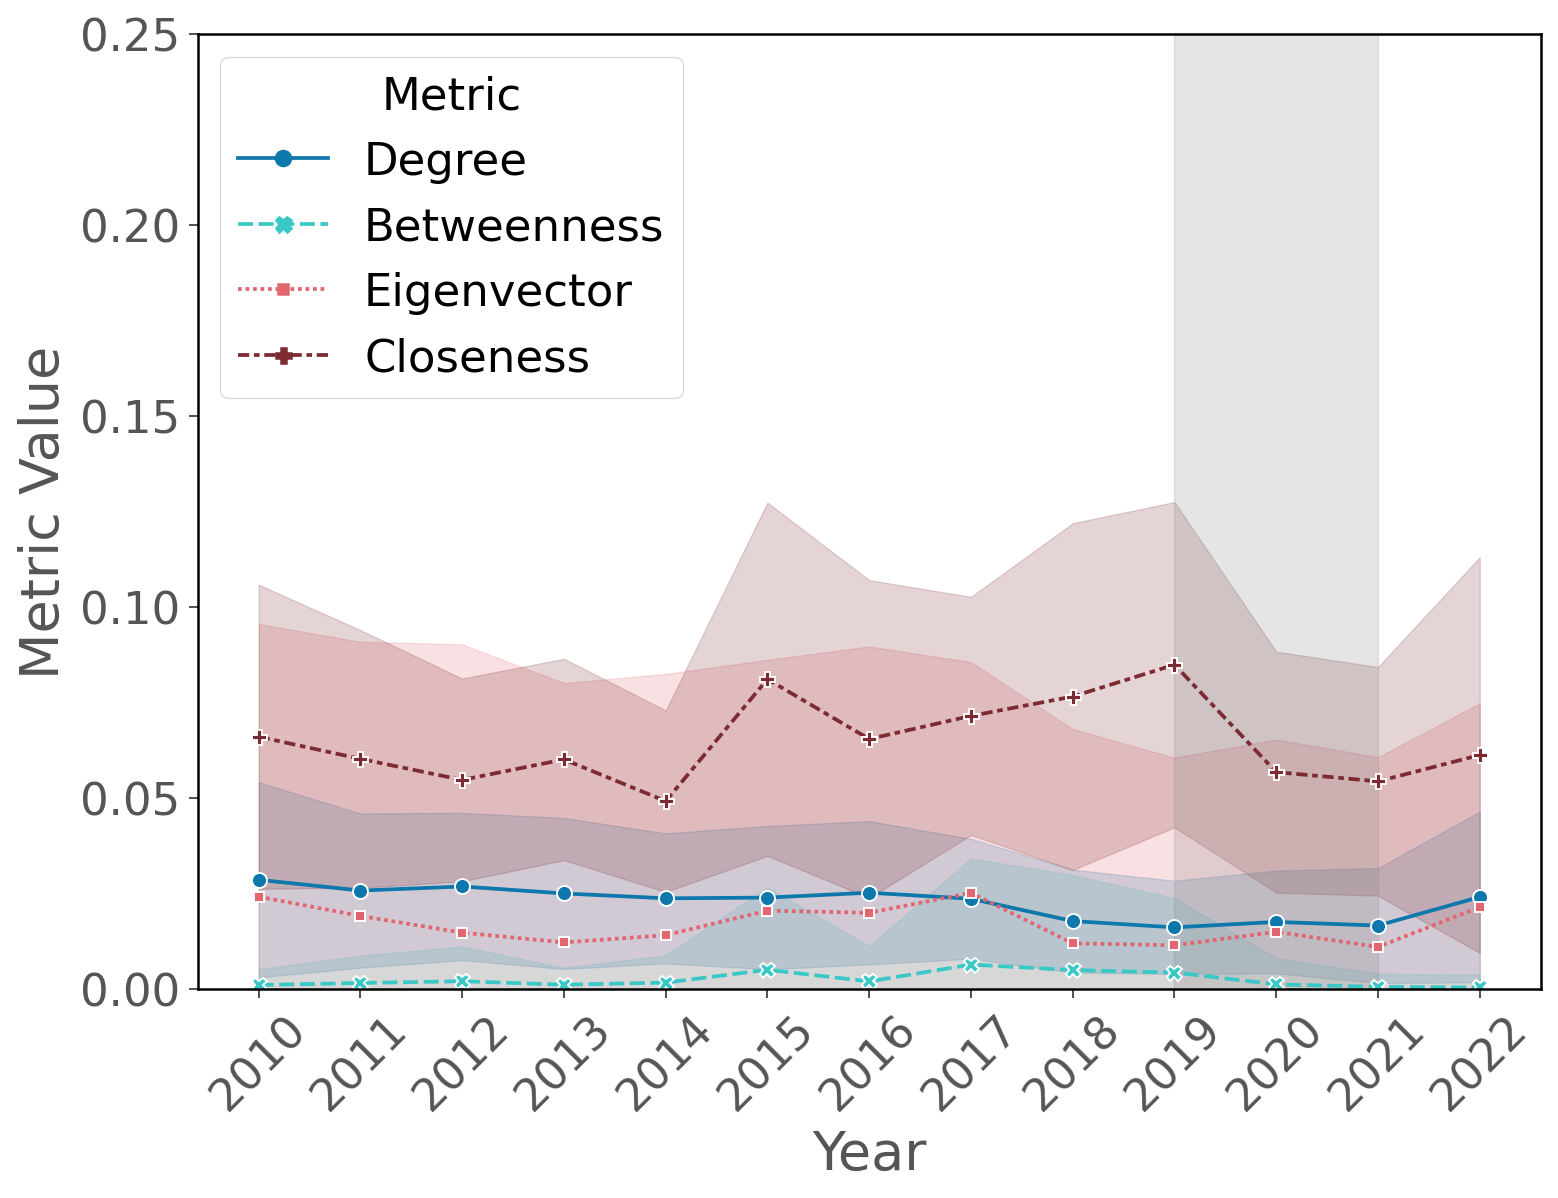

In [58]:
# Plotting the data.
plot_multiple_line_chart_sns(df, "year", "metric_value", "metric_name", None,
                             "Year", "Metric Value", 0.25, True, True, "Metric",
                             ["Degree", "Betweenness", "Eigenvector", "Closeness"],
                             name_fig="../data/output/01_centrality_metrics_iso.png")

In [59]:
# Getting the data.
df = df_metrics_agg[df_metrics_agg.metric_name.isin(
    ["degree", "betweenness", "eigenvector", "closeness"])].copy()

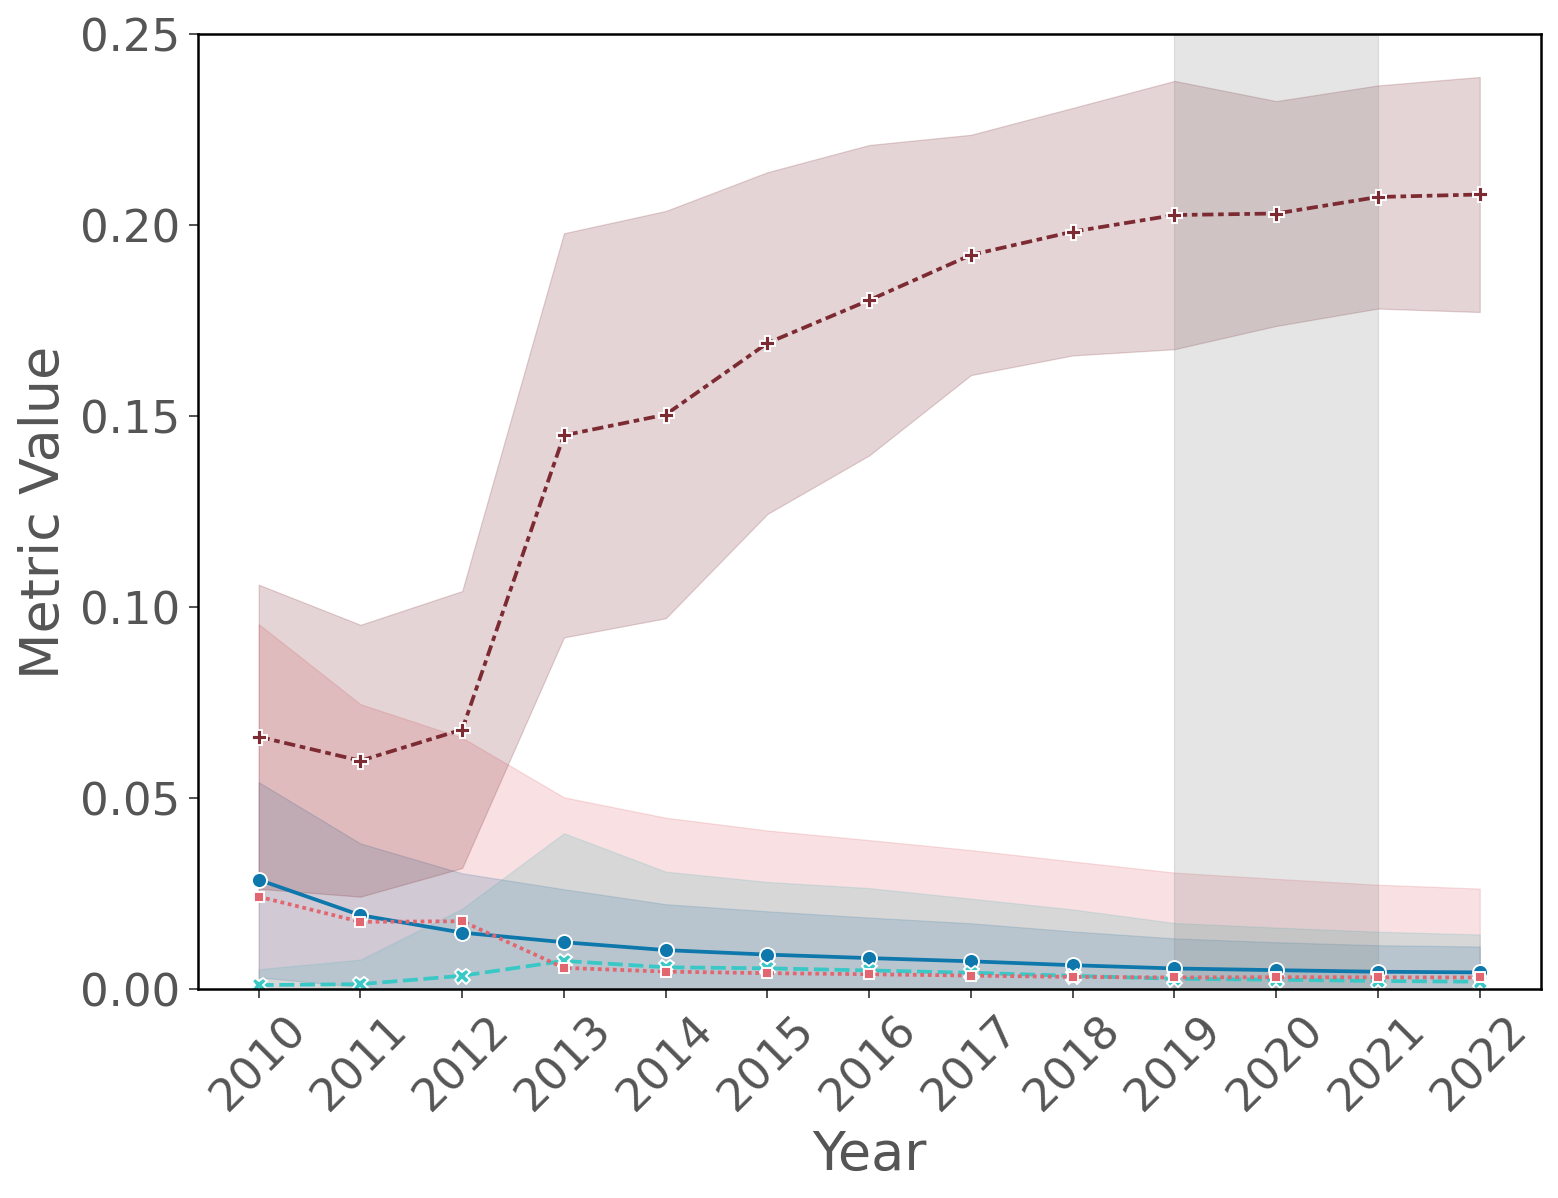

In [60]:
# Plotting the data.
plot_multiple_line_chart_sns(df, "year", "metric_value", "metric_name", None,
                             "Year", "Metric Value", 0.25, True, False,
                             name_fig="../data/output/02_centrality_metrics_agg.png")

In [61]:
# Getting the data.
df = df_metrics_4_window[df_metrics_4_window.metric_name.isin(
    ["degree", "betweenness", "eigenvector", "closeness"])].copy()

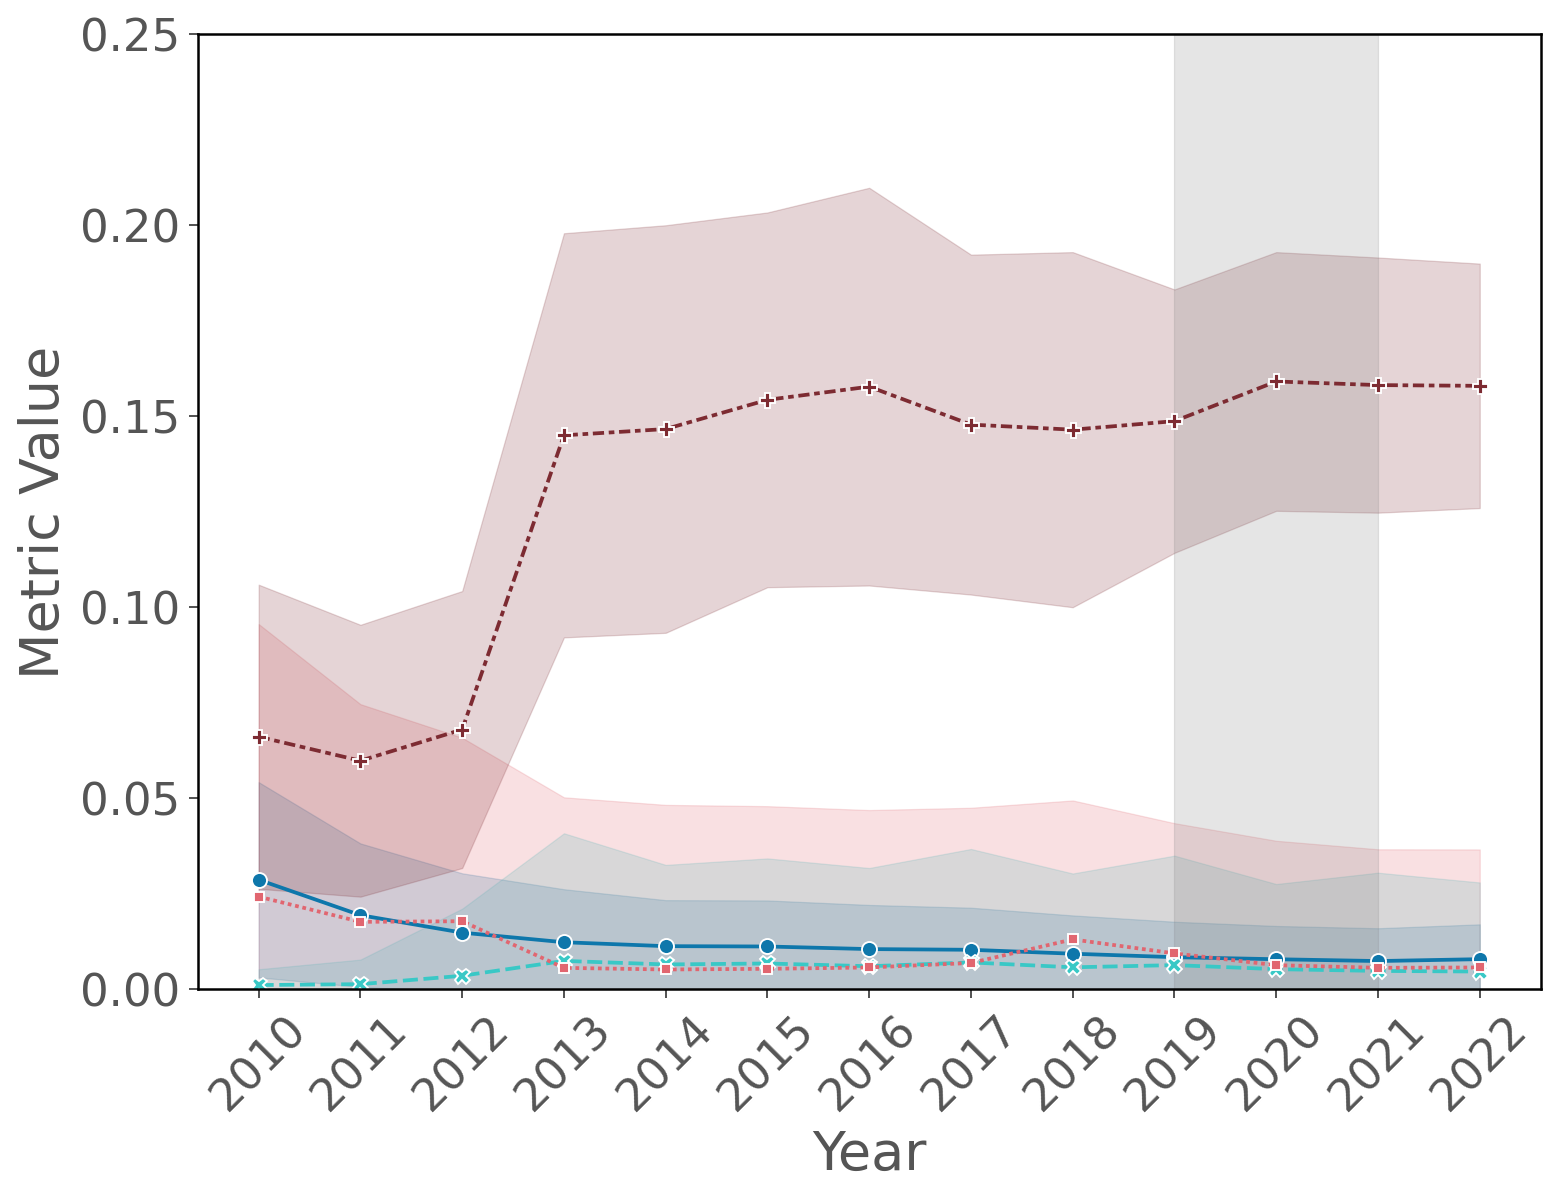

In [62]:
# Plotting the data.
plot_multiple_line_chart_sns(df, "year", "metric_value", "metric_name", None,
                             "Year", "Metric Value", 0.25, True, False,
                             name_fig="../data/output/03_centrality_metrics_4_window.png")

#### 5.1.2. Cohesion Analysis by Connected Components (CC) Analysis

In [63]:
# Function to generate the histogram data.
def get_data_hist_cc(networks, only_members=True):
    records = []
    for year, G in networks.items():
        if only_members:
            members = [id for id, node in G.nodes(data=True) if node["is_permanent"]]
            nodes = [n for m in members for n in G.neighbors(m)]
            nodes = list(set([*members, *nodes]))
            G = nx.subgraph(G, nodes)
        for idx, cc in enumerate(nx.connected_components(G)):
            record = {}
            record["year"] = year
            record["id_cc"] = idx + 1
            record["number_nodes_cc"] = len(cc)
            records.append(record)
    return pd.DataFrame(records)

##### 5.1.2.1. Distribution of Number of Nodes in CC (Isolated Scenario)

In [64]:
# Getting the data.
df = get_data_hist_cc(net_isolated)
df = df[["year", "number_nodes_cc"]]
data = df.year.value_counts().to_frame("isolated")
df = df[df.number_nodes_cc < 130]

/Users/breno/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/breno/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/breno/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/breno/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


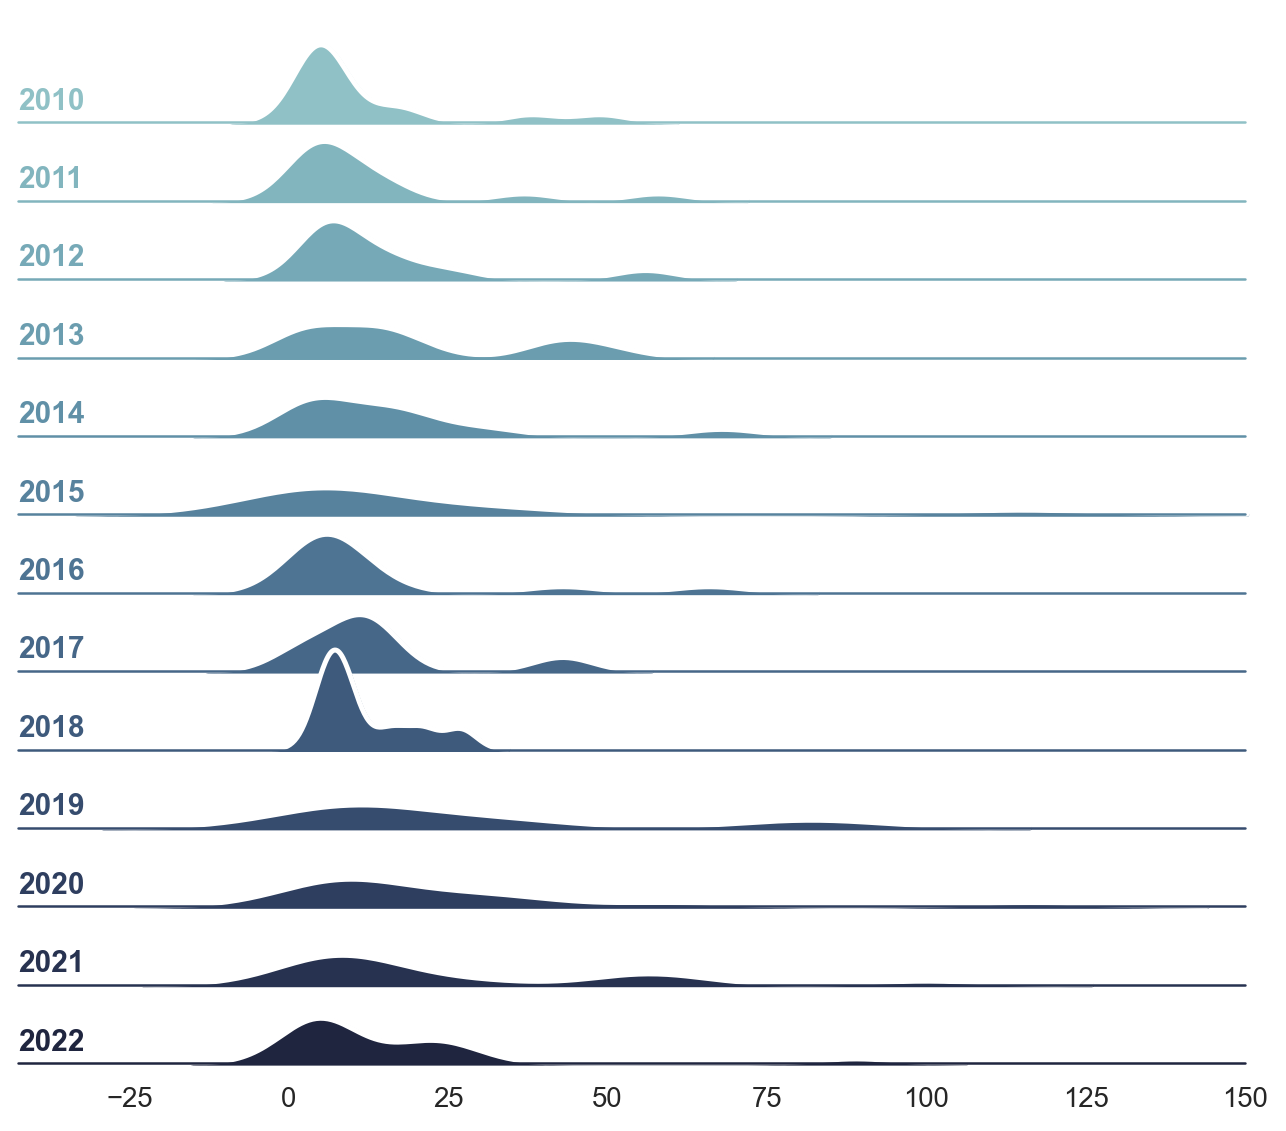

In [65]:
# Plotting the data.
plot_overlapping_kdes(df, "number_nodes_cc", "year",
                      "Nº. of Nodes in Connected Components", 150,
                      "../data/output/04_cc_analysis_iso.png")

In [66]:
# Restoring the config of Matplotlib.
set_config_plt()

##### 5.1.2.2. Time Series of Number of Connected Components

In [67]:
# Getting and listing the data.
data["cumulative"] = get_data_hist_cc(net_cumulative)[["year", "number_nodes_cc"]].year.value_counts()
data["window_4"] = get_data_hist_cc(net_4_window)[["year", "number_nodes_cc"]].year.value_counts()
data = data.reset_index().rename(columns={"index": "year"}).sort_values("year").reset_index(drop=True)
data

,year,isolated,cumulative,window_4
0,2010,15,15,15
1,2011,14,15,15
2,2012,11,10,10
3,2013,11,6,6
4,2014,12,5,5
5,2015,9,3,4
6,2016,13,2,4
7,2017,8,1,3
8,2018,10,1,3
9,2019,6,1,1


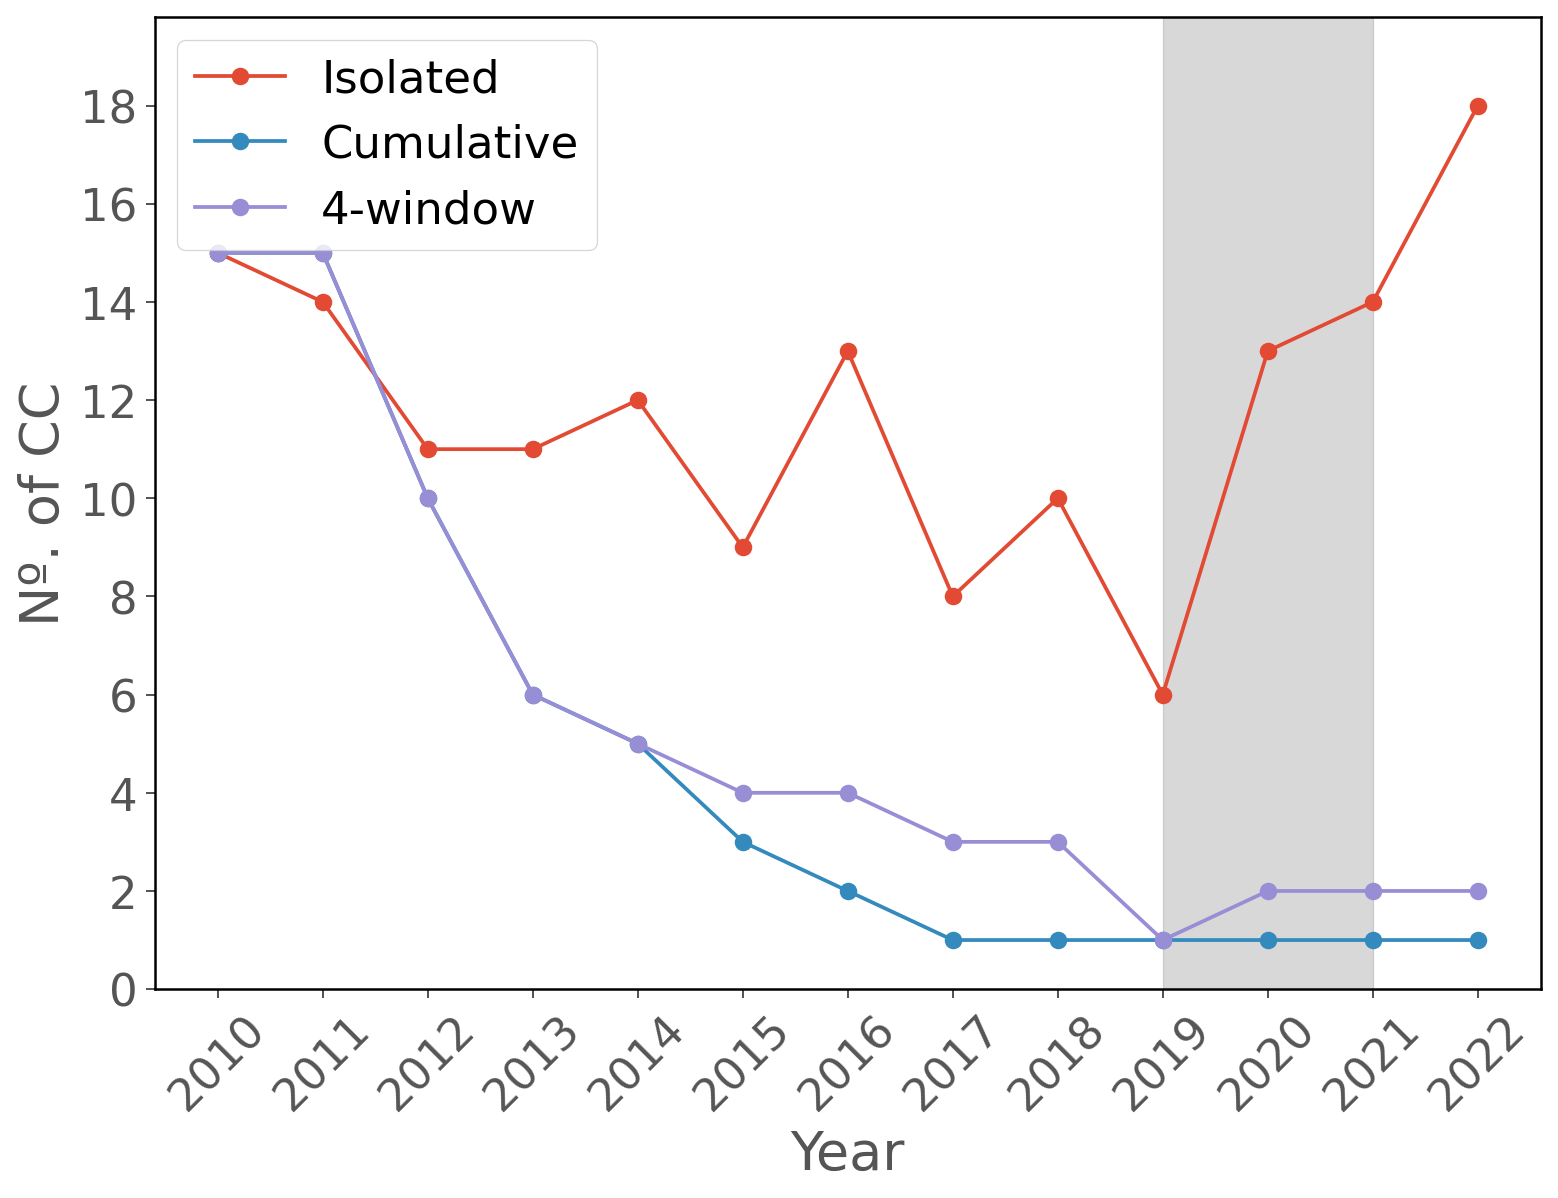

In [68]:
# Plotting the data.
plot_multiple_line_chart(data, data.columns[0], data.columns[1:].tolist(),
                         ["Isolated", "Cumulative", "4-window"], None,
                         "Year", "Nº. of CC", None, y_is_int=True, external_legend=False,
                         name_fig="../data/output/05_time_series_num_cc.png")

#### 5.1.3. Clustering Analysis of Research Group's Temporal Nets

##### 5.1.3.1. Isolated Scenario

In [69]:
# Getting the data.
df = df_metrics_iso[["year", "total_num_paper"]].groupby("year").first().reset_index()
data = get_graph_embedding(dict(net_isolated))
data["num_paper"] = df["total_num_paper"].astype(np.int64)
data.year = data.year.apply(lambda x: str(int(x)))

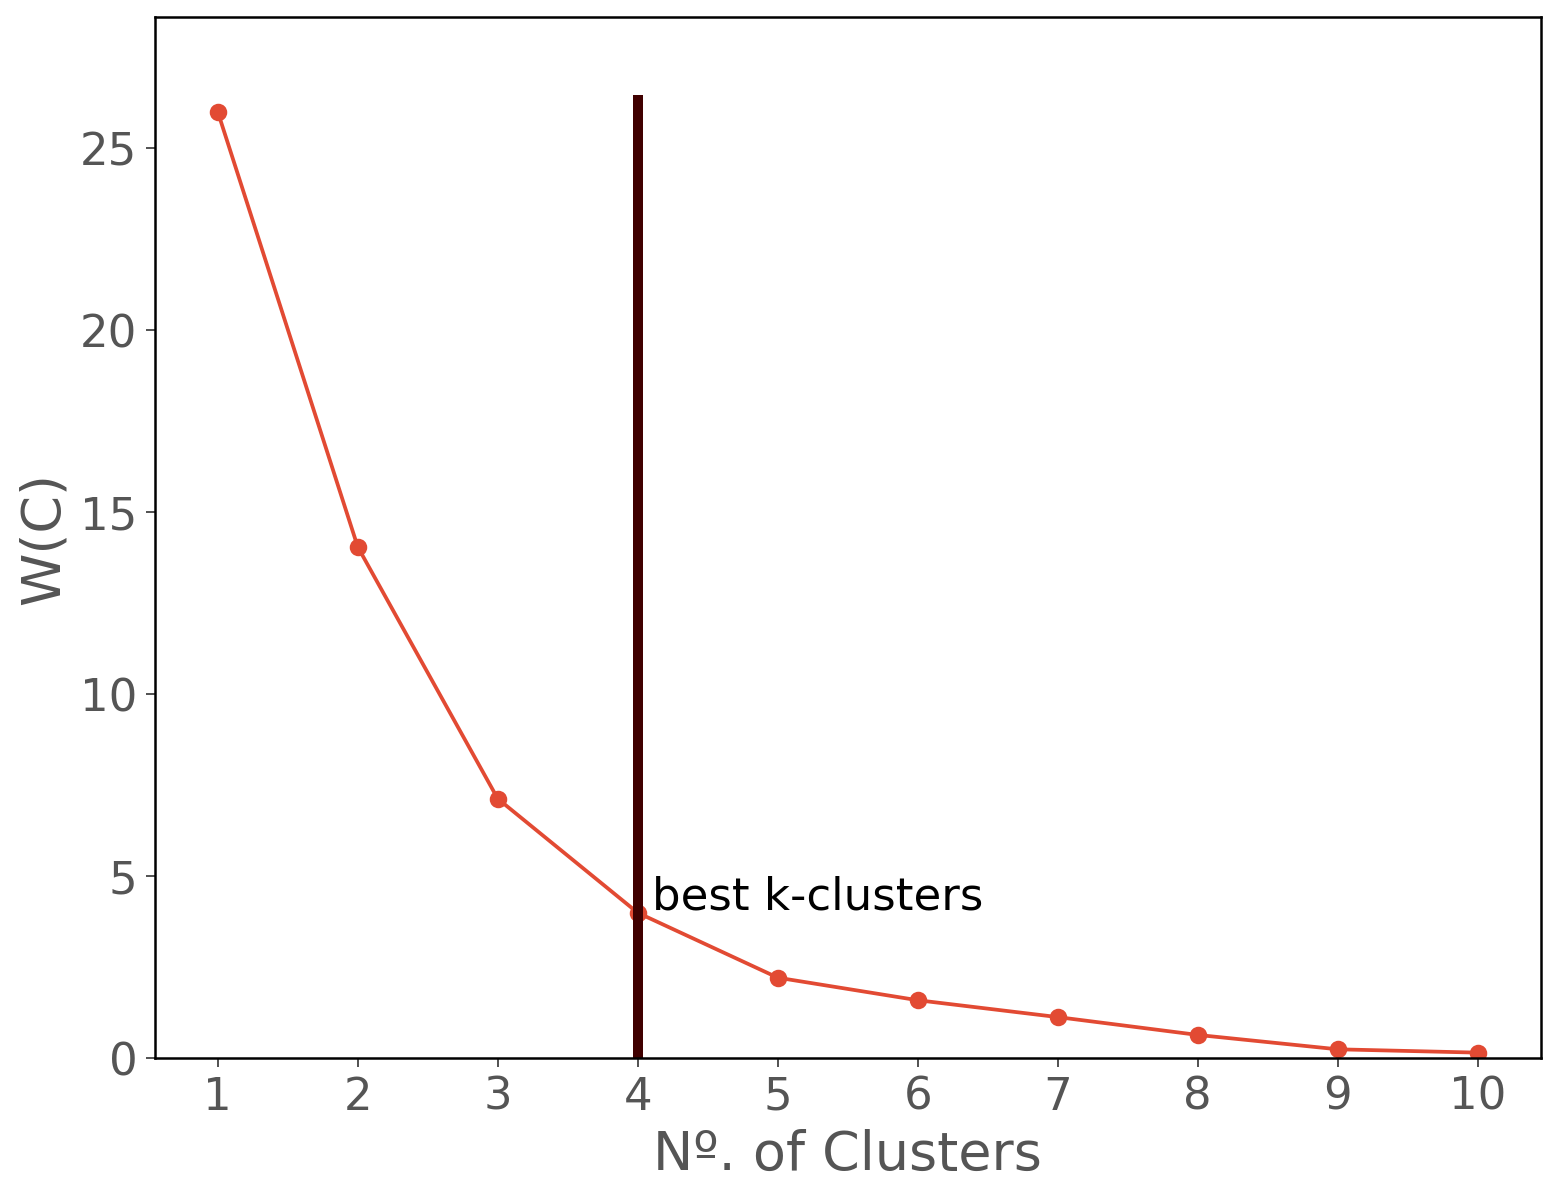

In [70]:
# Trying to discovery the optimal k.
sse = elbow_method(data.iloc[:, 1:3].copy(), 10)
plot_single_line_chart(sse.index, sse.values, "Nº. of Clusters", "W(C)", None,
                       "../data/output/06_elbow_k_optimal_iso.png", 4, "best k-clusters")

In [71]:
# Clustering the data.
data["cluster"] = clustering_kmeans(data.iloc[:, 1:3].copy(), 4)

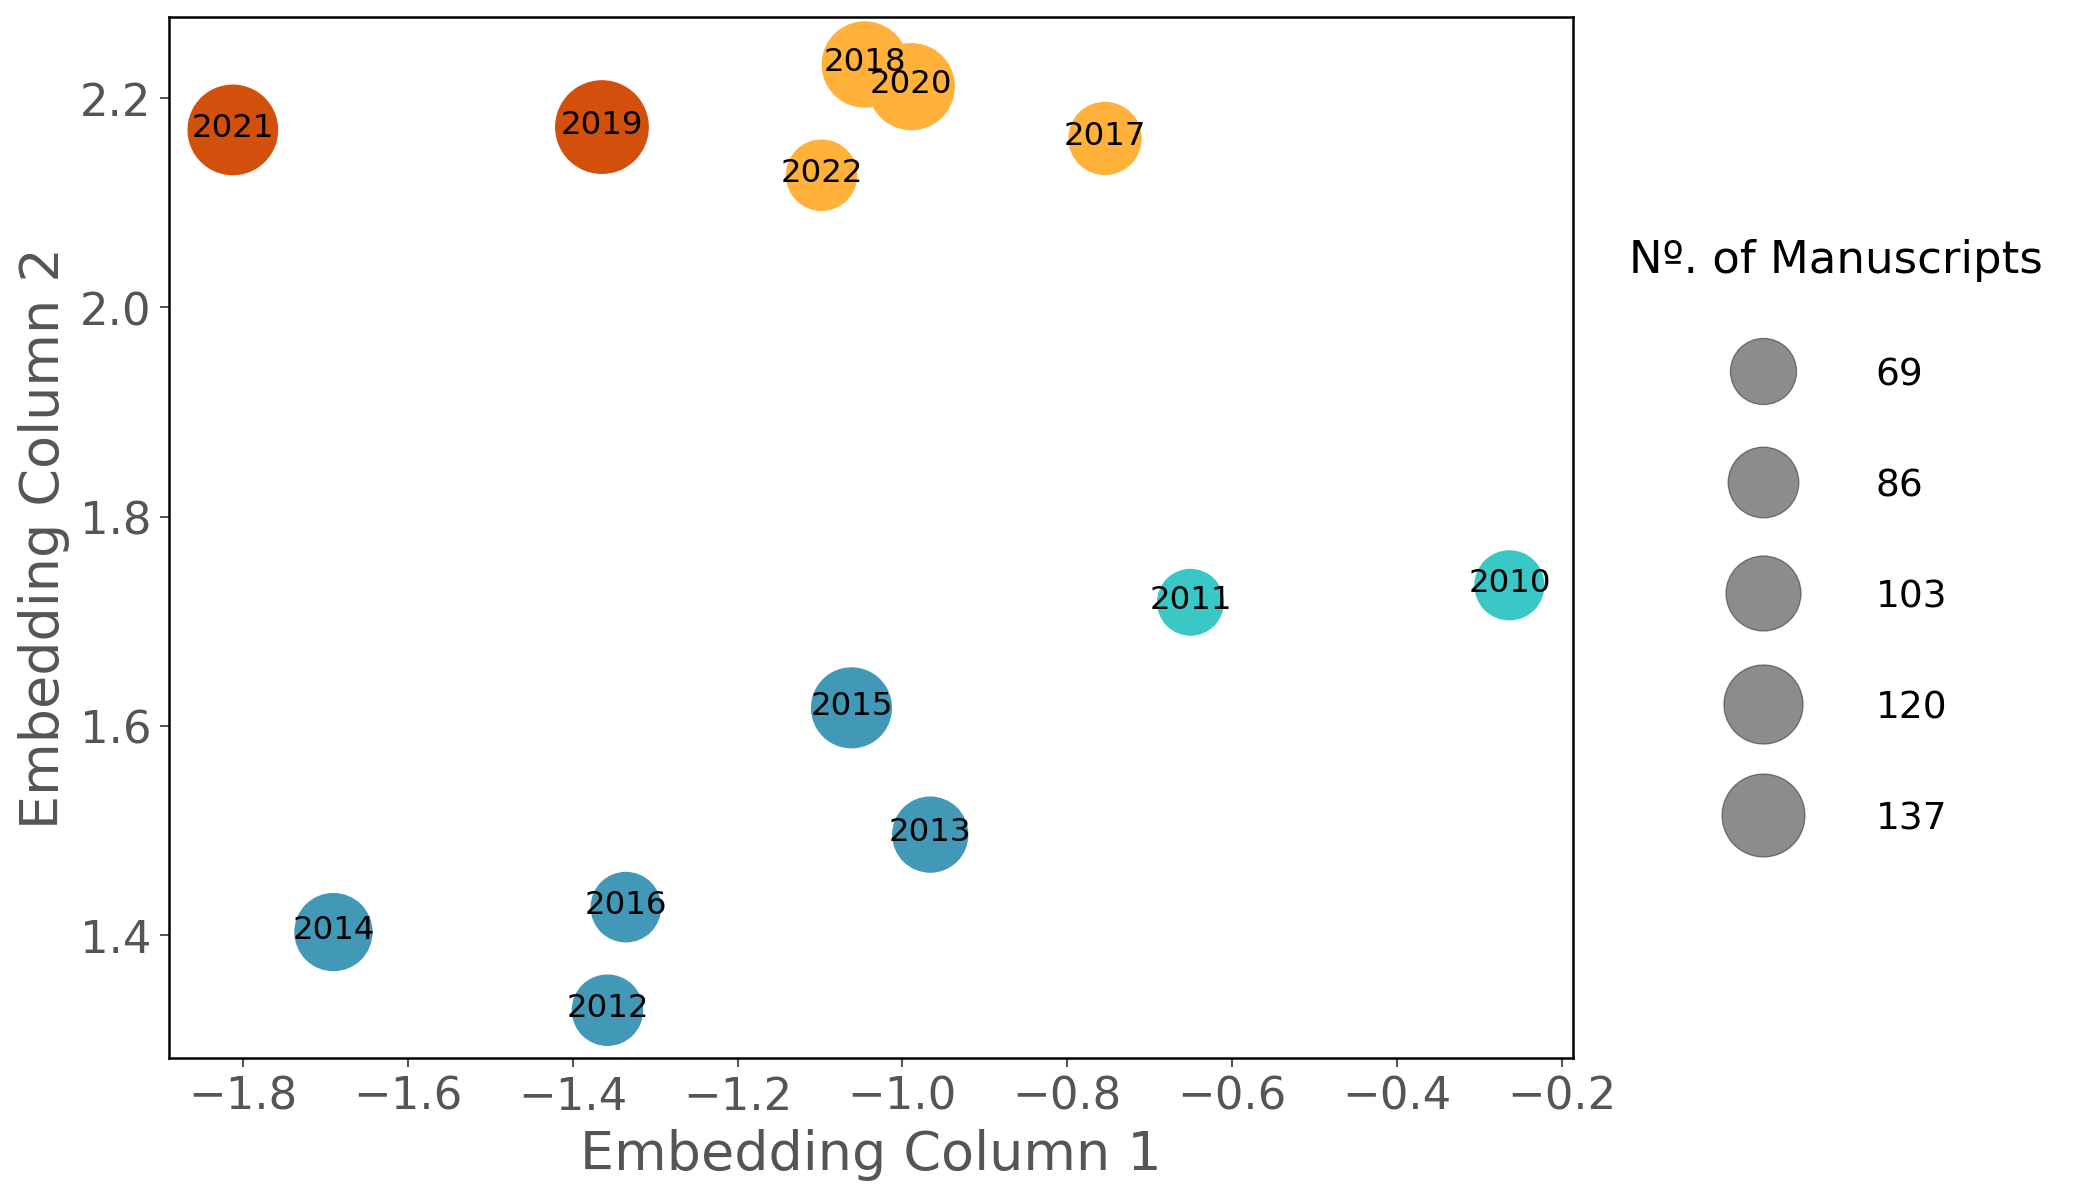

In [72]:
# Plotting the clustering result.
plot_clusters(data, "column_1", "column_2", "cluster", "num_paper", "year",
              "Embedding Column 1", "Embedding Column 2", None,
              name_fig="../data/output/07_clustering_embeddings_iso.png")

##### 5.1.3.2. 4-Window Cumulative Scenario

In [73]:
# Getting the data.
df = df_metrics_4_window[["year", "total_num_paper"]].groupby("year").first().reset_index()
data = get_graph_embedding(dict(net_4_window))
data["num_paper"] = df["total_num_paper"].astype(np.int64).values
data.year = data.year.apply(lambda x: str(int(x)))

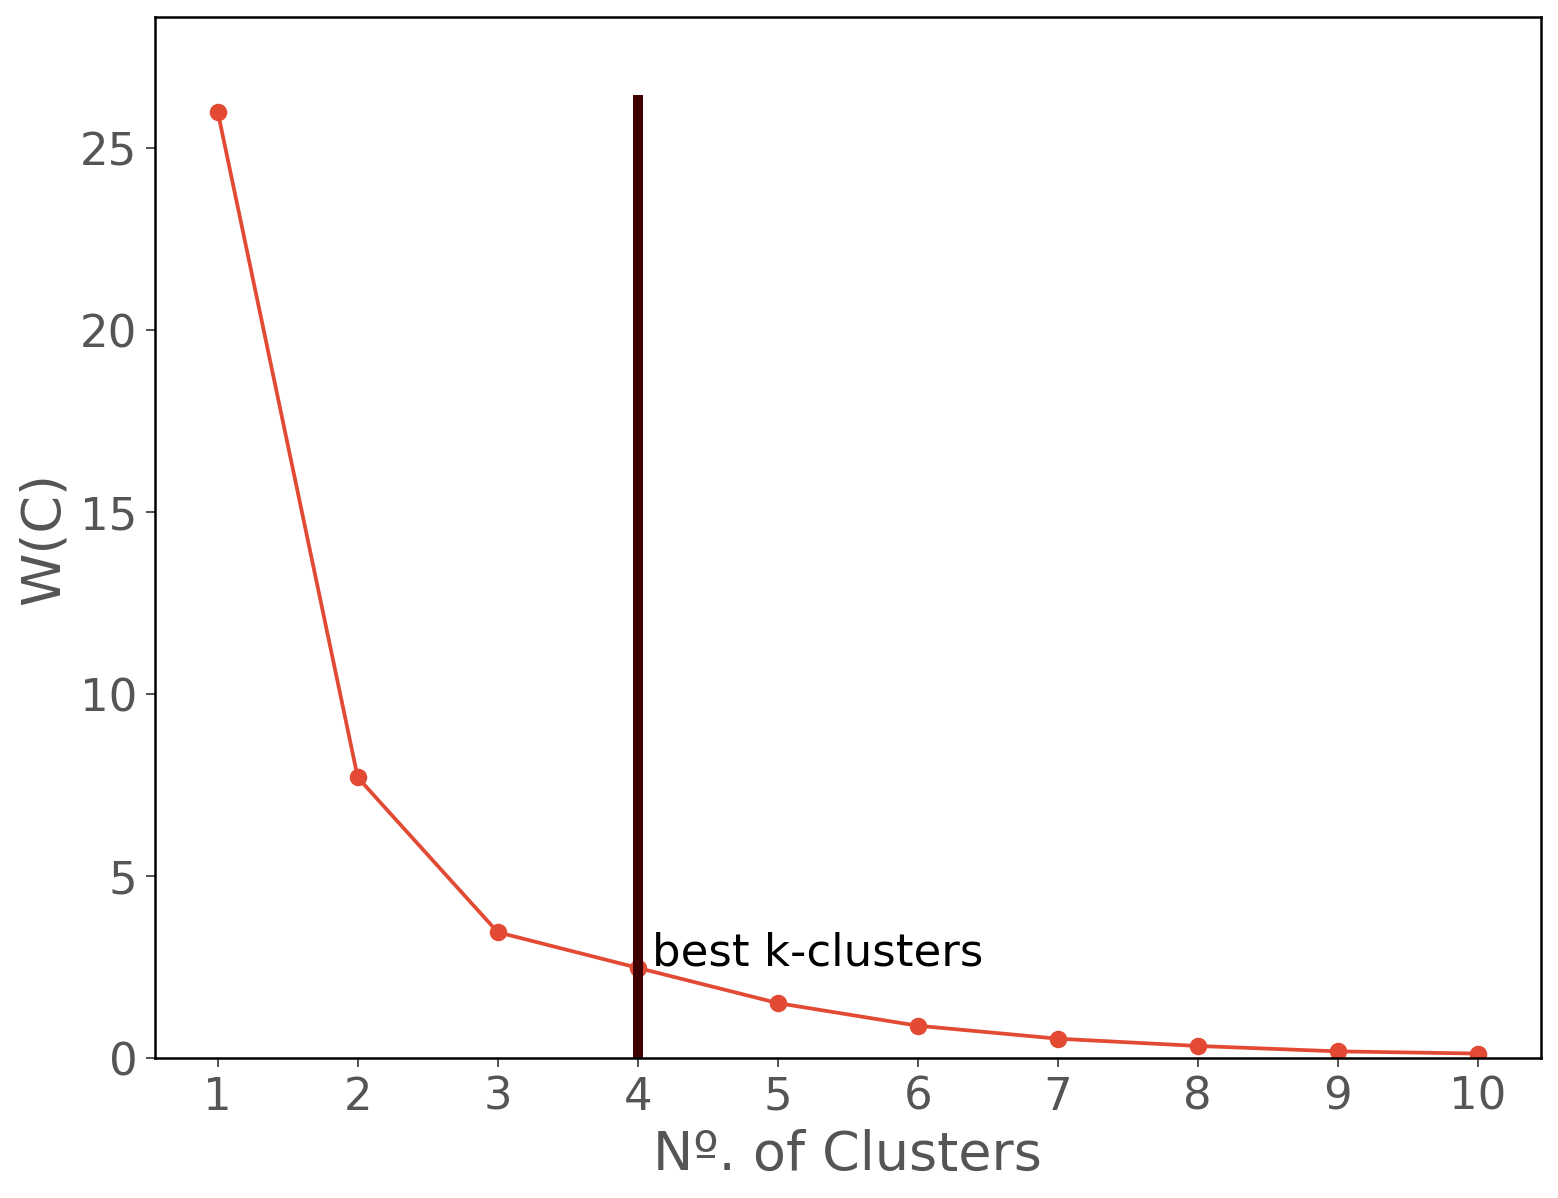

In [74]:
# Trying to discovery the optimal k.
sse = elbow_method(data.iloc[:, 1:3].copy(), 10)
plot_single_line_chart(sse.index, sse.values, "Nº. of Clusters", "W(C)", None,
                       "../data/output/08_elbow_k_optimal_window_emb.png", 4, "best k-clusters")

In [75]:
# Clustering the data.
data["cluster"] = clustering_kmeans(data.iloc[:, 1:3].copy(), 4)

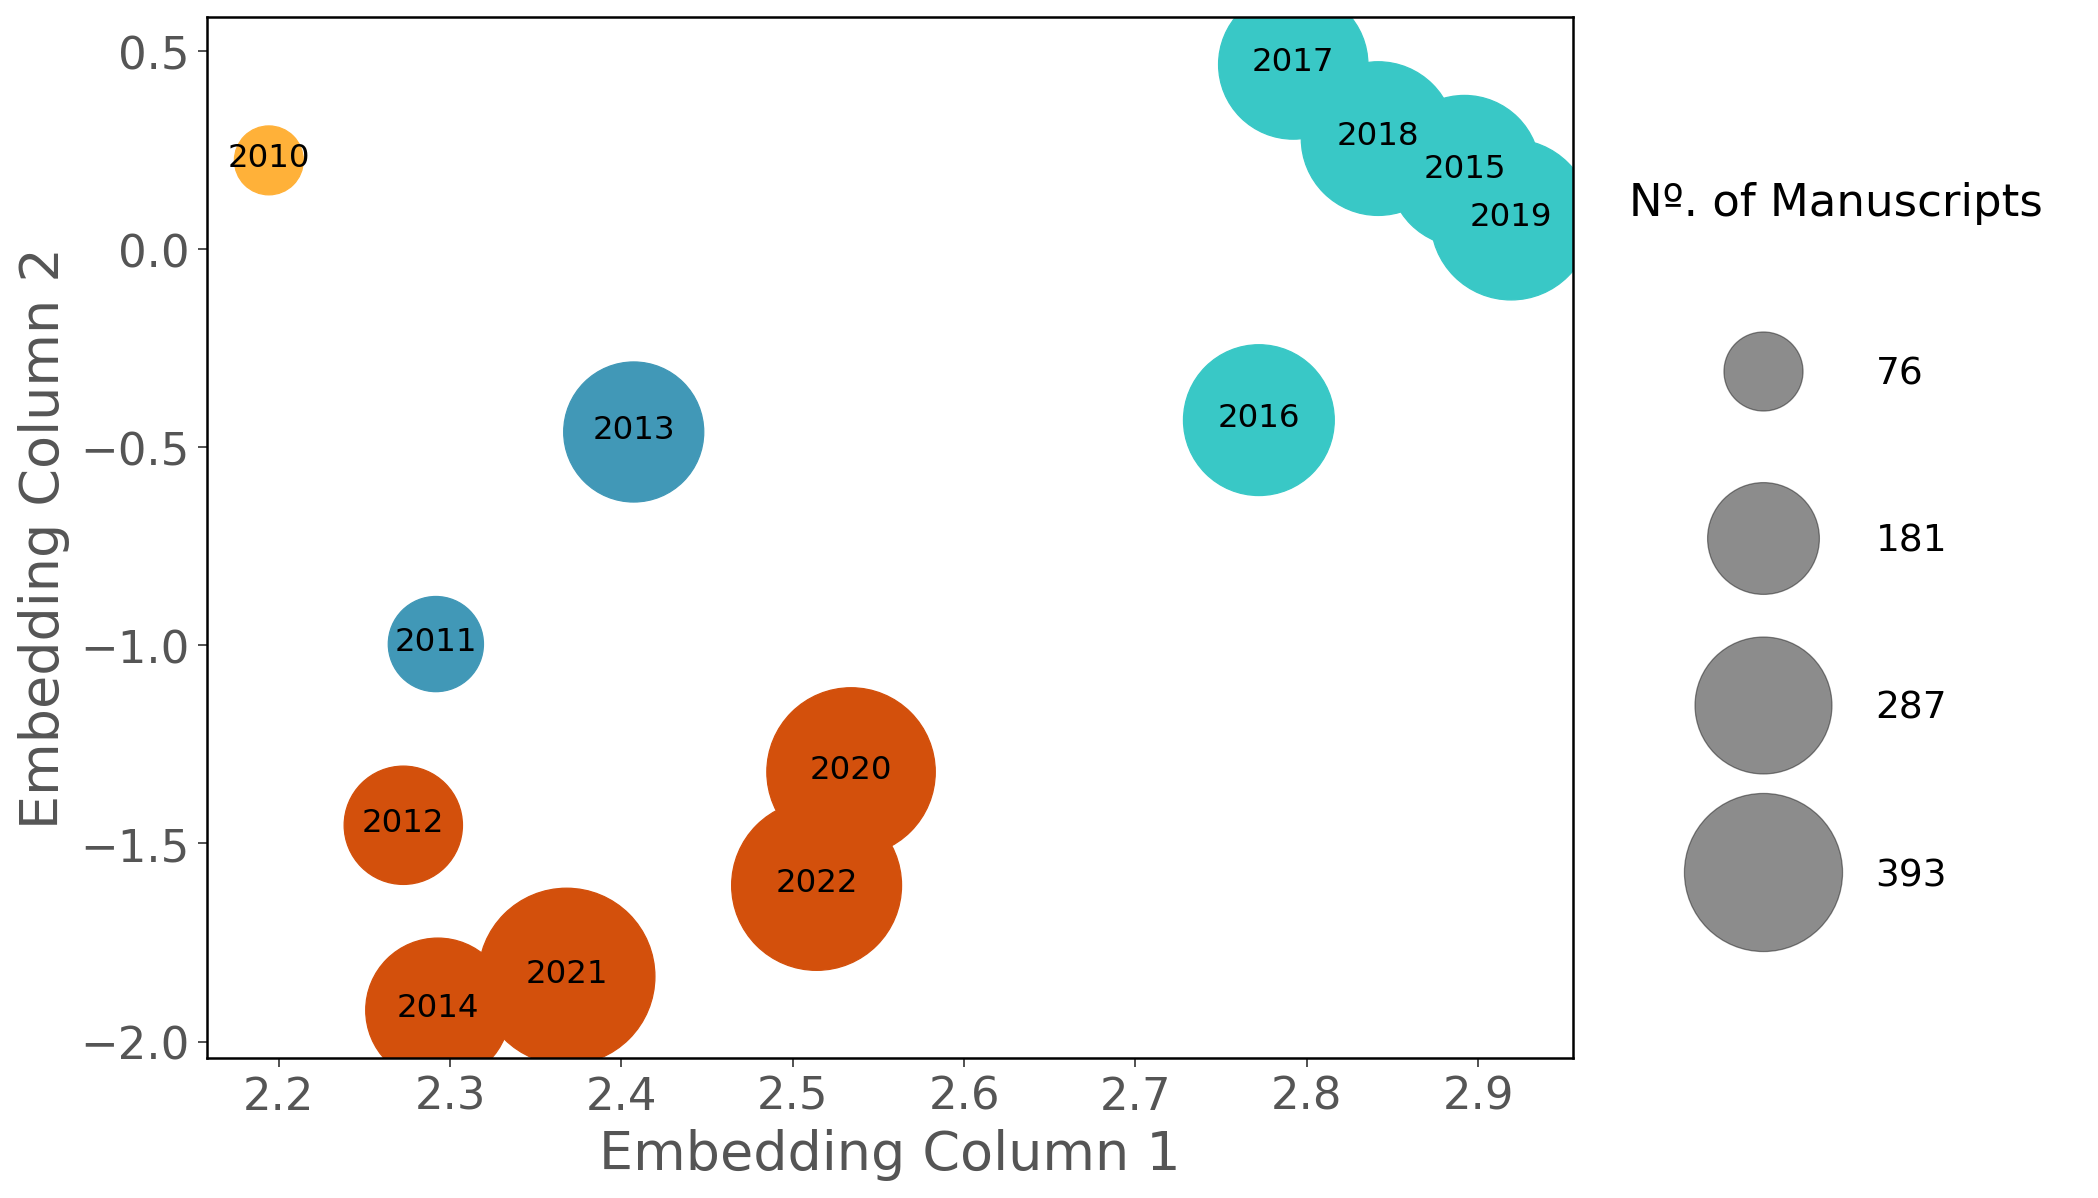

In [76]:
# Plotting the clustering result.
plot_clusters(data, "column_1", "column_2", "cluster", "num_paper", "year",
              "Embedding Column 1", "Embedding Column 2", None,
              space_legend=3.5, name_fig="../data/output/09_clustering_embeddings_window.png")

### 5.2. Members' Analysis

#### 5.2.1. Clustering Analysis of Members for Discovery of Research Lines

In [77]:
# Getting the number of members per research line.
num_members_per_rl = df_members.research_line.value_counts()
num_members_per_rl.index = [discretize_research_line(idx) for idx in num_members_per_rl.index]

##### 5.2.1.1. CNA Metrics

In [78]:
# Function to generate the data for specific year.
def get_data_researcher(dataframe, year):
    columns = ["metric_name", "researcher", "metric_value"]
    columns_agg = ["mean", "min", "max", "std"]
    metrics = ["betweenness", "closeness", "eigenvector", "degree",
               "eccentricity_scc", "clustering", "num_cliques"]
    data = dataframe.loc[(dataframe.year == year) & (dataframe.metric_name == "degree"),
                         ["researcher", "num_paper"]].reset_index(drop=True).sort_values("researcher")
    df_temp = dataframe[columns].groupby(["metric_name", "researcher"]).agg(columns_agg).reset_index()
    df_temp.columns = ["metric_name", "researcher", "mean", "min", "max", "std"]
    for member in data.researcher.values:
        for m in metrics:
            data.loc[data.researcher == member, ["{}_{}".format(m, c) for c in columns_agg]] = df_temp.loc[
                (df_temp.metric_name == m) & (df_temp.researcher == member), columns_agg].values \
                    if not df_temp.loc[(df_temp.metric_name == m) & (df_temp.researcher == member),
                        columns_agg].empty else [None] * len(columns_agg)
    data.fillna(0, inplace=True)
    data["id"] = data.researcher.apply(lambda x: df_members.loc[df_members.complete_name == x, "identifiers"].iloc[0][0])
    data = data[[*data.columns.tolist()[-1:], *data.columns.tolist()[:-1]]]
    data = data.reset_index().rename(columns={"index": "id_alt"})
    data["id_alt"] += 1
    return data

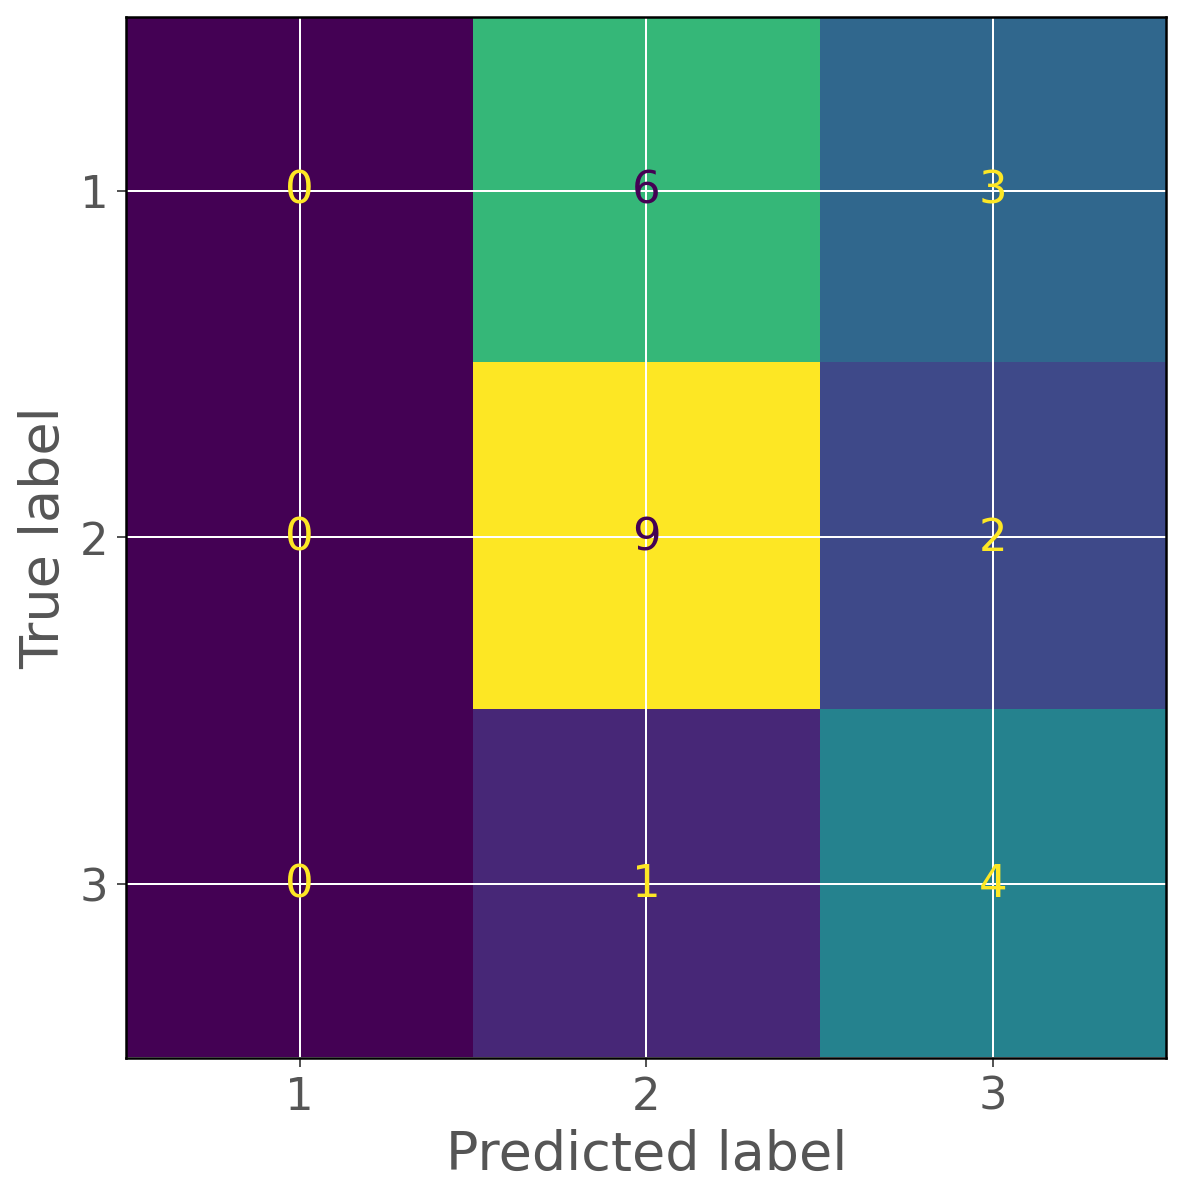

/Users/breno/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/breno/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/breno/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.56      0.82      0.67        11
           3       0.44      0.80      0.57         5

    accuracy                           0.52        25
   macro avg       0.34      0.54      0.41        25
weighted avg       0.34      0.52      0.41        25



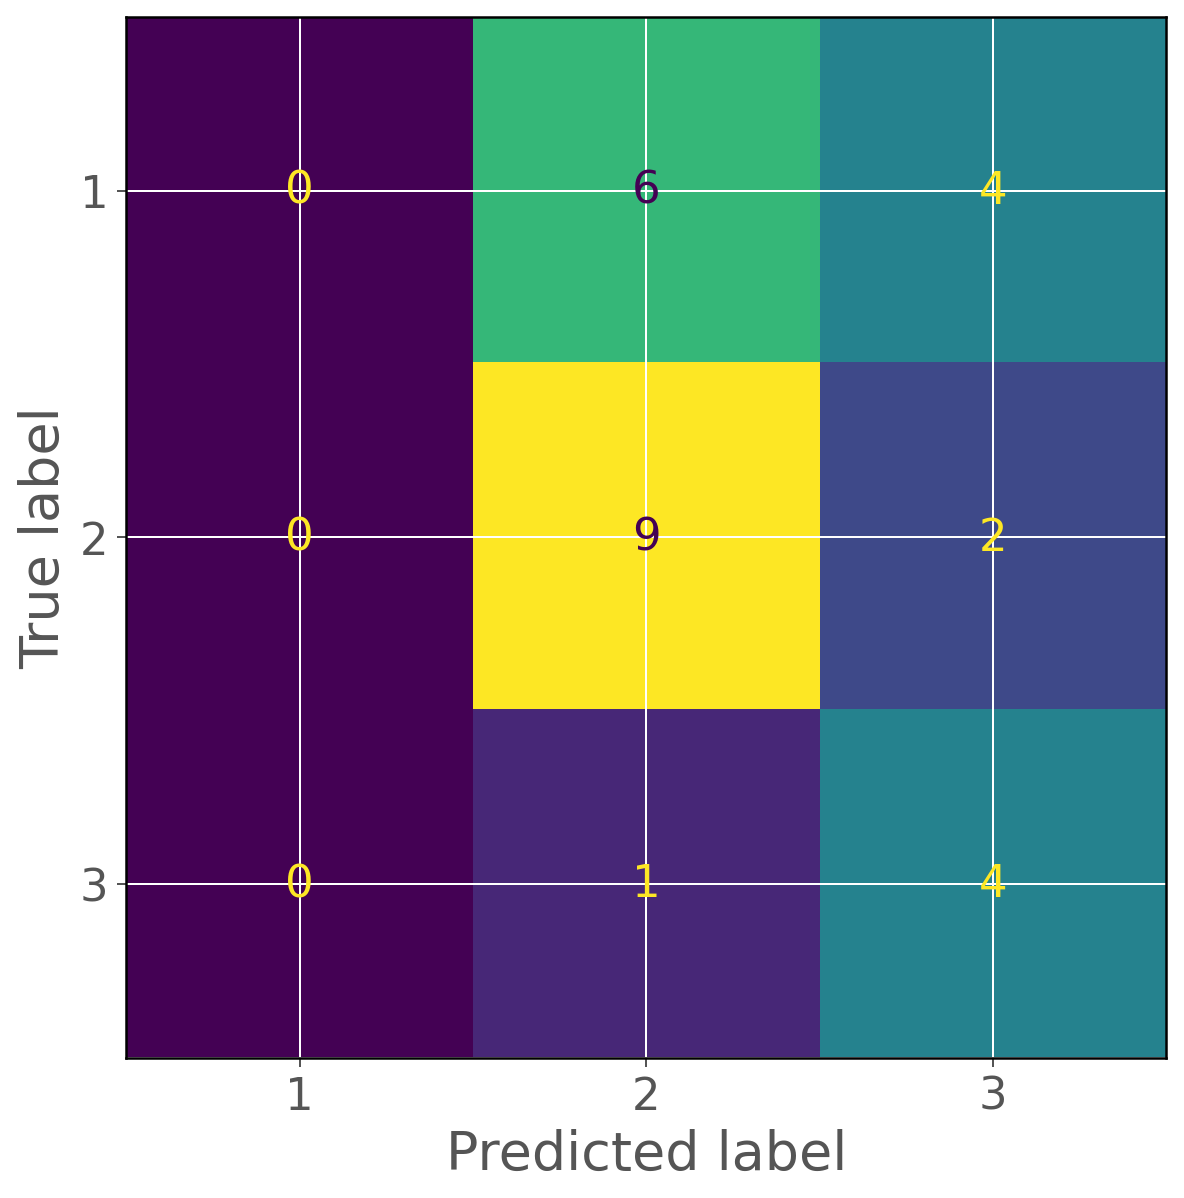

/Users/breno/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/breno/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/breno/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.56      0.82      0.67        11
           3       0.40      0.80      0.53         5

    accuracy                           0.50        26
   macro avg       0.32      0.54      0.40        26
weighted avg       0.31      0.50      0.38        26



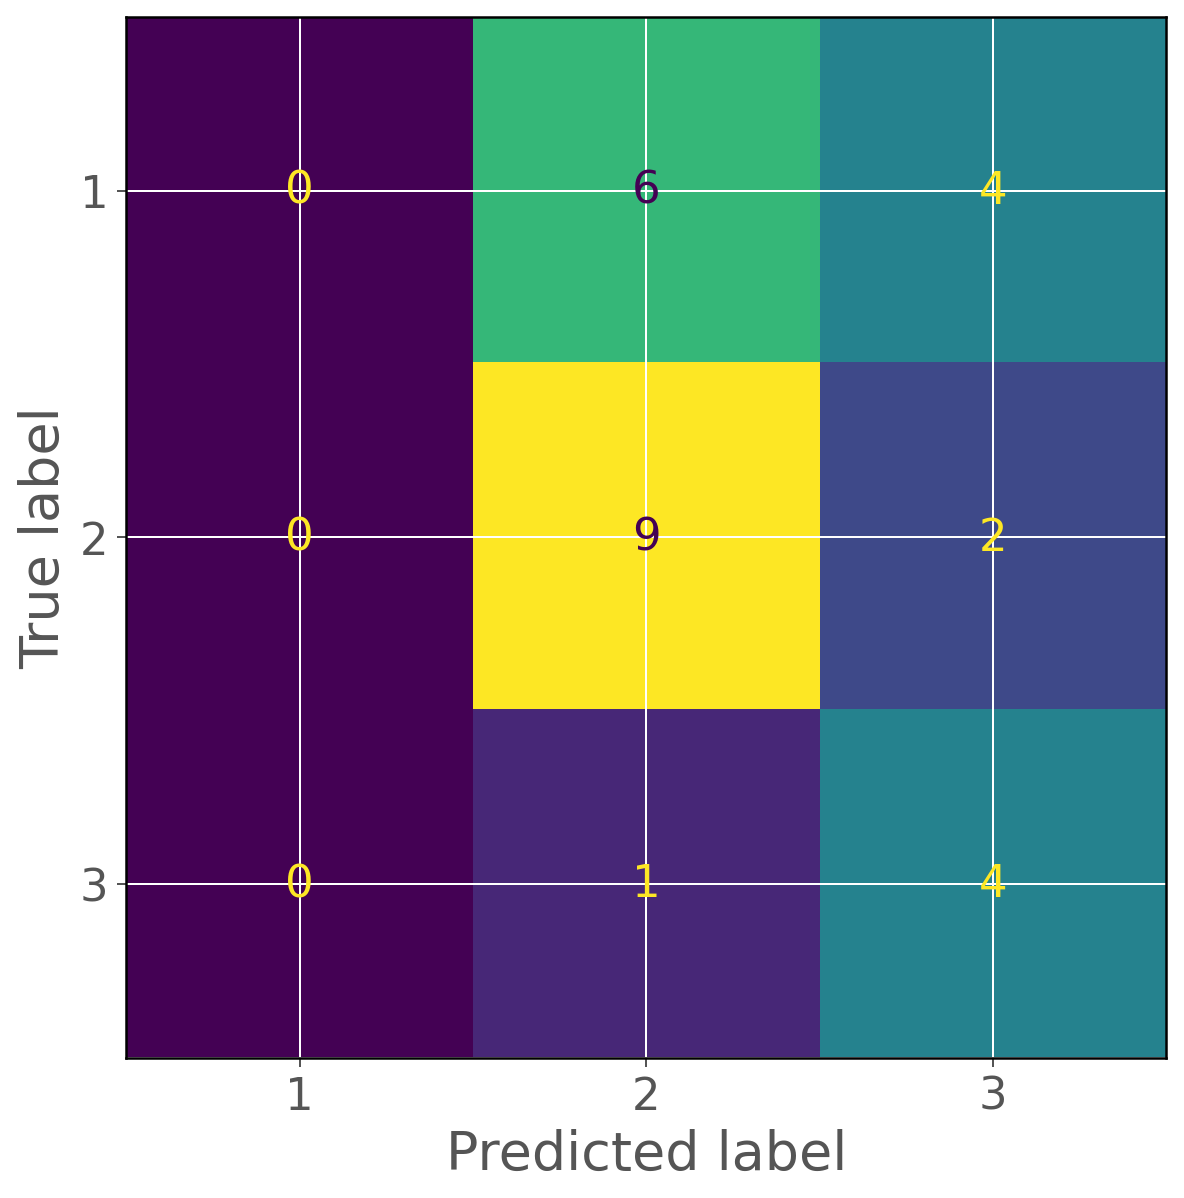

/Users/breno/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/breno/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/breno/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.56      0.82      0.67        11
           3       0.40      0.80      0.53         5

    accuracy                           0.50        26
   macro avg       0.32      0.54      0.40        26
weighted avg       0.31      0.50      0.38        26



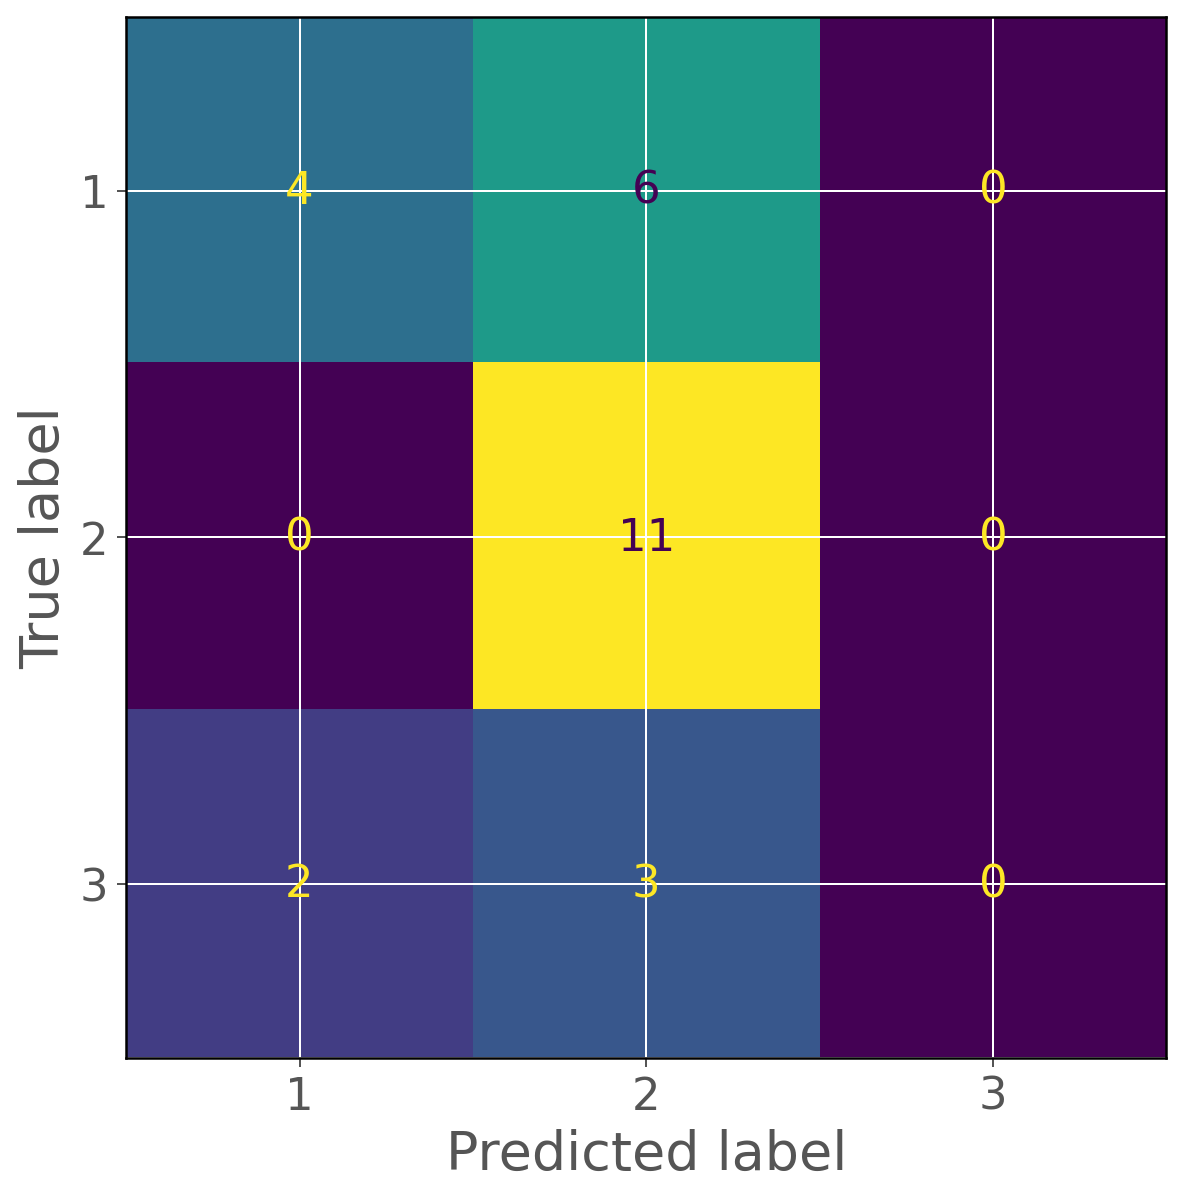

/Users/breno/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/breno/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/breno/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.67      0.40      0.50        10
           2       0.55      1.00      0.71        11
           3       0.00      0.00      0.00         5

    accuracy                           0.58        26
   macro avg       0.41      0.47      0.40        26
weighted avg       0.49      0.58      0.49        26



In [79]:
dataframes = [df_members_4_window, df_members_2_window]
for year, idx in {2012: 0, 2016: 0, 2020: 0, 2022: 1}.items():
    # Gettind and preprocessing the data.
    df = get_data_researcher(dataframes[idx].copy(), year)

    # Clustering the data.
    df["cluster"] = clustering_kmeans(df.iloc[:, 4:].copy(), 3)
    df["cluster"] += 1
    df["cluster"] = df["cluster"].astype("category")
    df["real_rl"] = df.researcher.apply(lambda x: discretize_research_line(
        df_members.research_line[df_members.complete_name == x].iloc[0]))
    df["pred_rl"] = set_research_line_from_cluster(df[["num_paper", "cluster", "real_rl"]].copy(),
                                                   num_members_per_rl)

    # Showing the classification result.
    plot_confusion_matrix(df["real_rl"], df["pred_rl"])
    print(classification_report(df["real_rl"], df["pred_rl"]))

    # Generating the net for visualization of nodes and saving the data.
    generate_net_cluster(net_cumulative[2022],
        df[["id", "id_alt", "num_paper", "cluster", "pred_rl"]].copy(),
        name_file="../data/output/cluster_metrics_{}.gexf".format(year))
    df.to_csv("../data/output/cluster_metrics_{}.csv".format(year), quoting=csv.QUOTE_ALL, index=False)

##### 5.2.1.2. Node Embeddings

In [80]:
# Function to generate the data for specific year.
def get_data_researcher(network, dataframe, year, dimensions=10):
    data = get_vector_from_graph(network, dimensions)
    data = data.loc[data.is_permanent == True].reset_index(drop=True)
    data = data.drop(columns=["h_index", "is_permanent", "research_line"])
    data = data.sort_values("complete_name").reset_index(drop=True)
    data = data.reset_index().rename(columns={"index": "id_alt", "id_scopus": "id"})
    data["id_alt"] += 1
    data.loc[:, "num_paper"] = data.complete_name.apply(
        lambda x: dataframe.loc[
            (dataframe.year == year) & (dataframe.researcher == x), "num_paper"].iloc[0])
    data = data[[*data.columns.tolist()[:3], *data.columns.tolist()[-1:], *data.columns.tolist()[3:-1]]]
    return data

Computing transition probabilities:   0%|          | 0/382 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  5.11it/s]


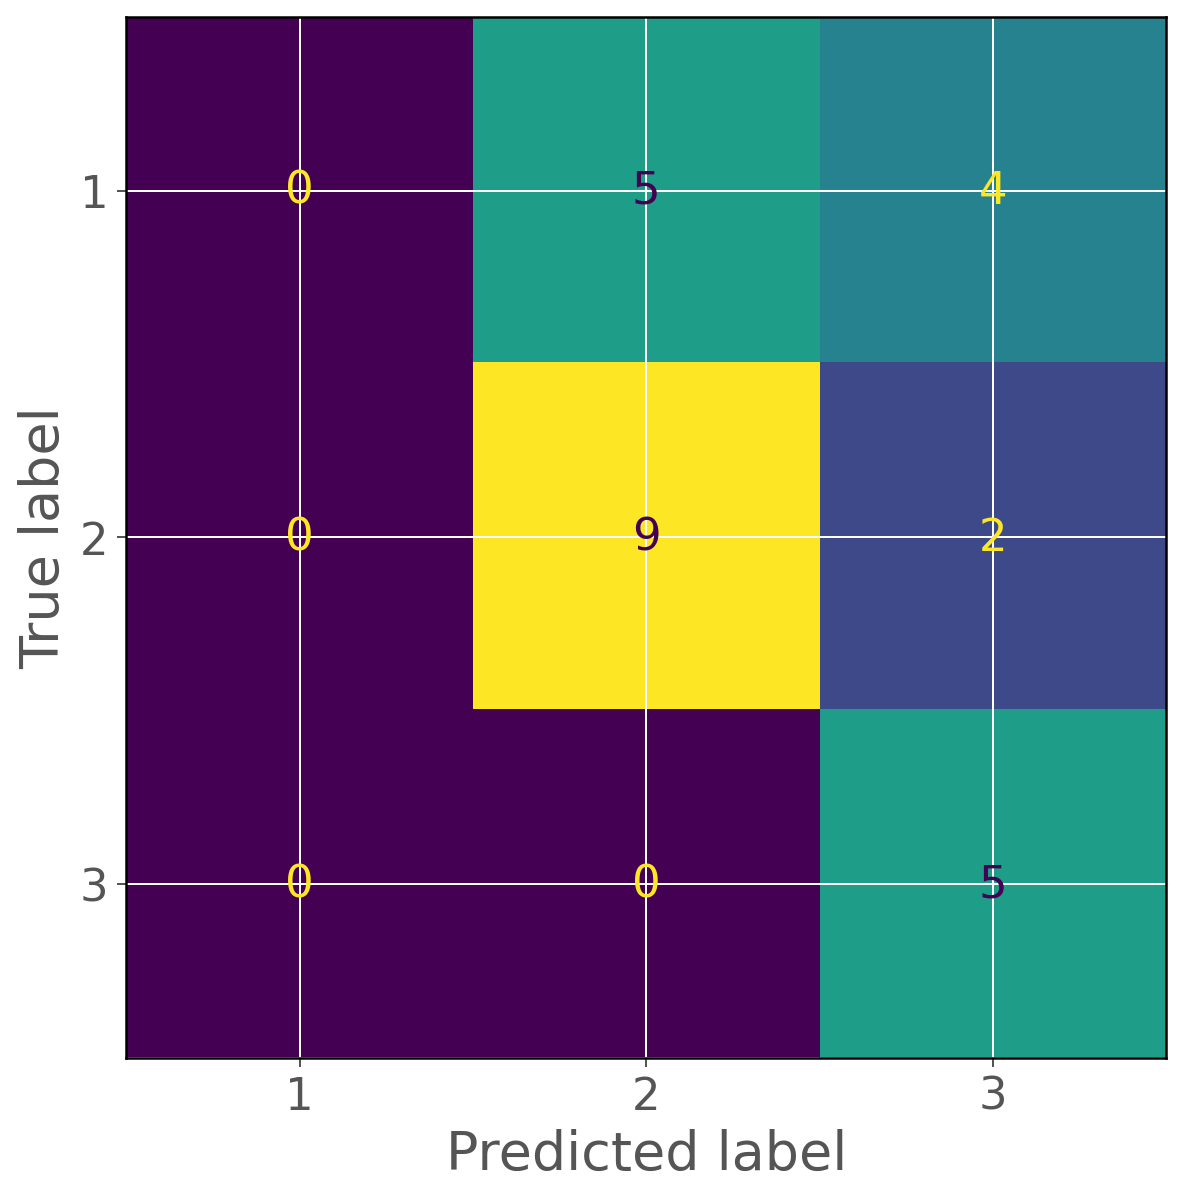

/Users/breno/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/breno/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/breno/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.64      0.82      0.72        11
           3       0.45      1.00      0.62         5

    accuracy                           0.56        25
   macro avg       0.37      0.61      0.45        25
weighted avg       0.37      0.56      0.44        25



Computing transition probabilities:   0%|          | 0/579 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:04<00:00,  2.04it/s]


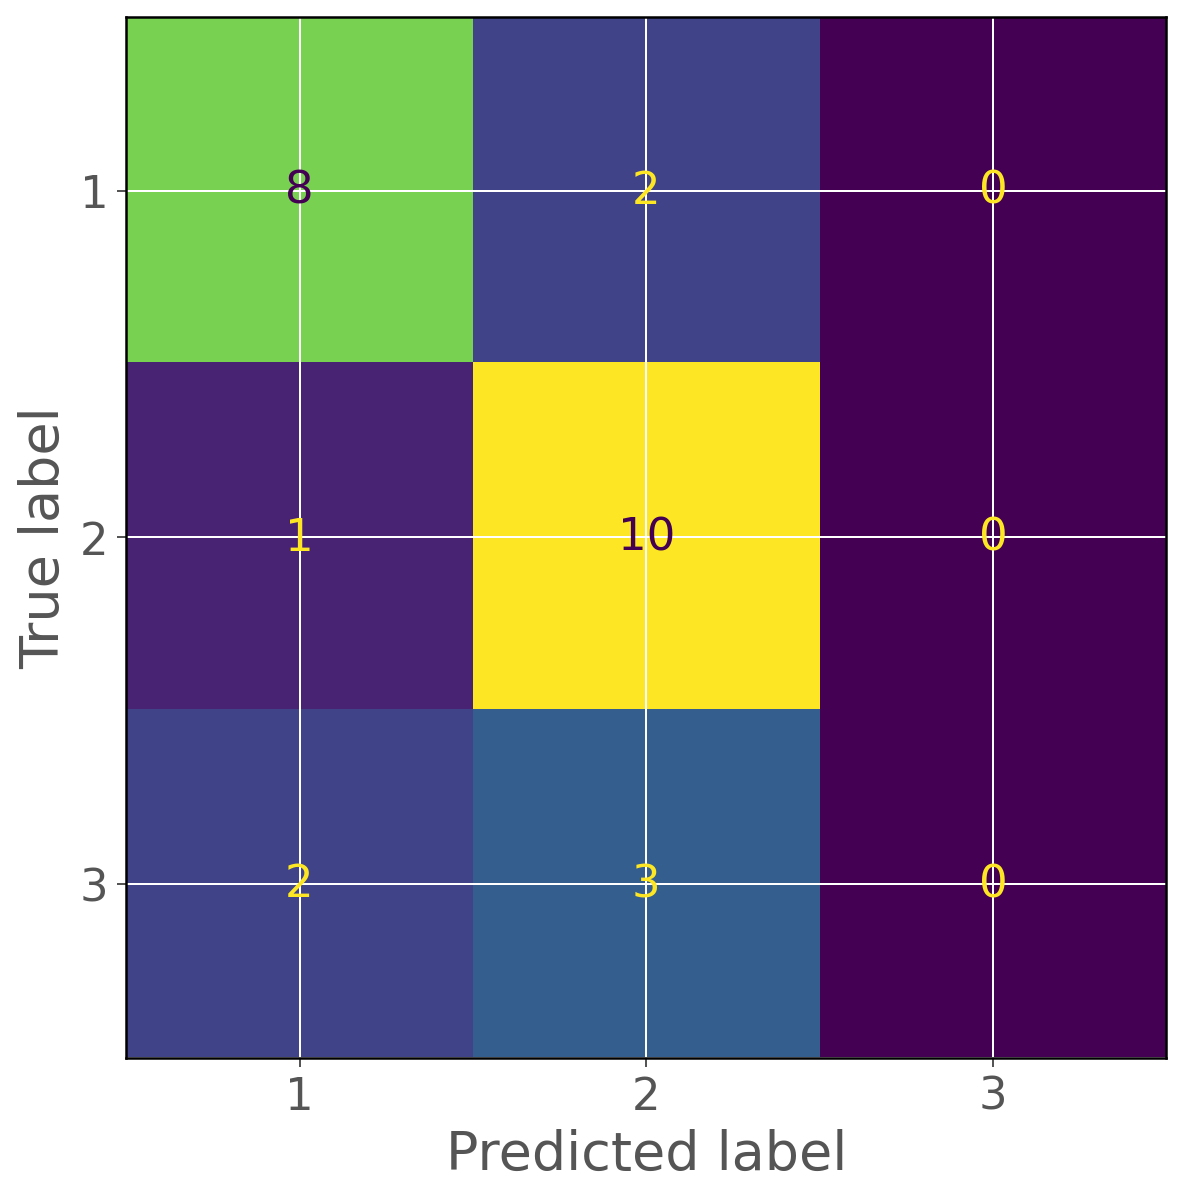

/Users/breno/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/breno/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/breno/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.73      0.80      0.76        10
           2       0.67      0.91      0.77        11
           3       0.00      0.00      0.00         5

    accuracy                           0.69        26
   macro avg       0.46      0.57      0.51        26
weighted avg       0.56      0.69      0.62        26



Computing transition probabilities:   0%|          | 0/910 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


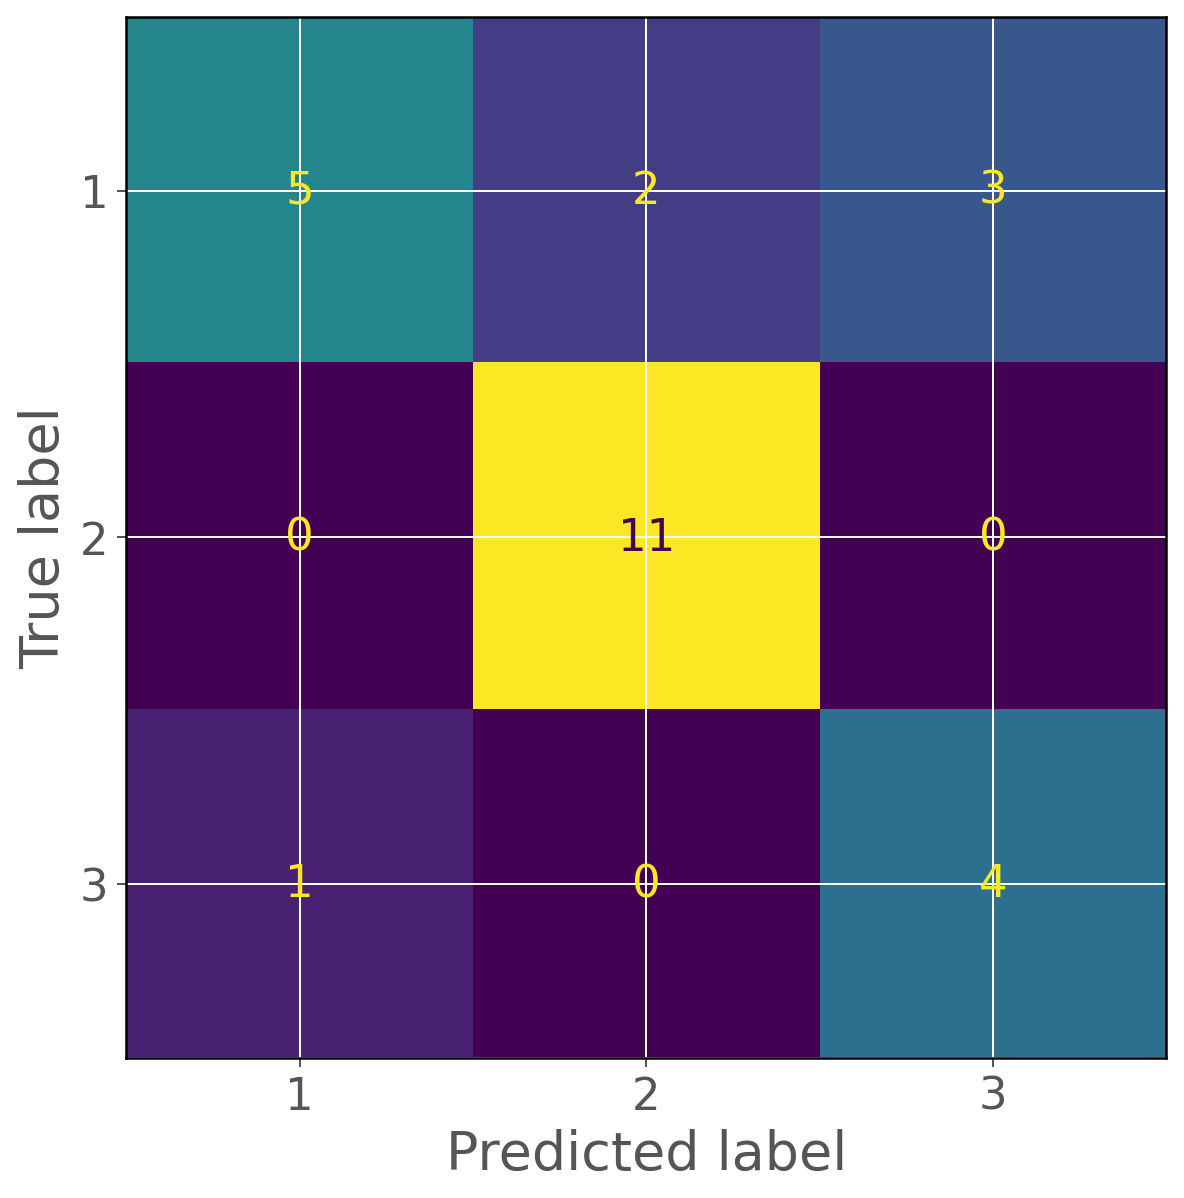

              precision    recall  f1-score   support

           1       0.83      0.50      0.62        10
           2       0.85      1.00      0.92        11
           3       0.57      0.80      0.67         5

    accuracy                           0.77        26
   macro avg       0.75      0.77      0.74        26
weighted avg       0.79      0.77      0.76        26



Computing transition probabilities:   0%|          | 0/583 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:03<00:00,  2.78it/s]


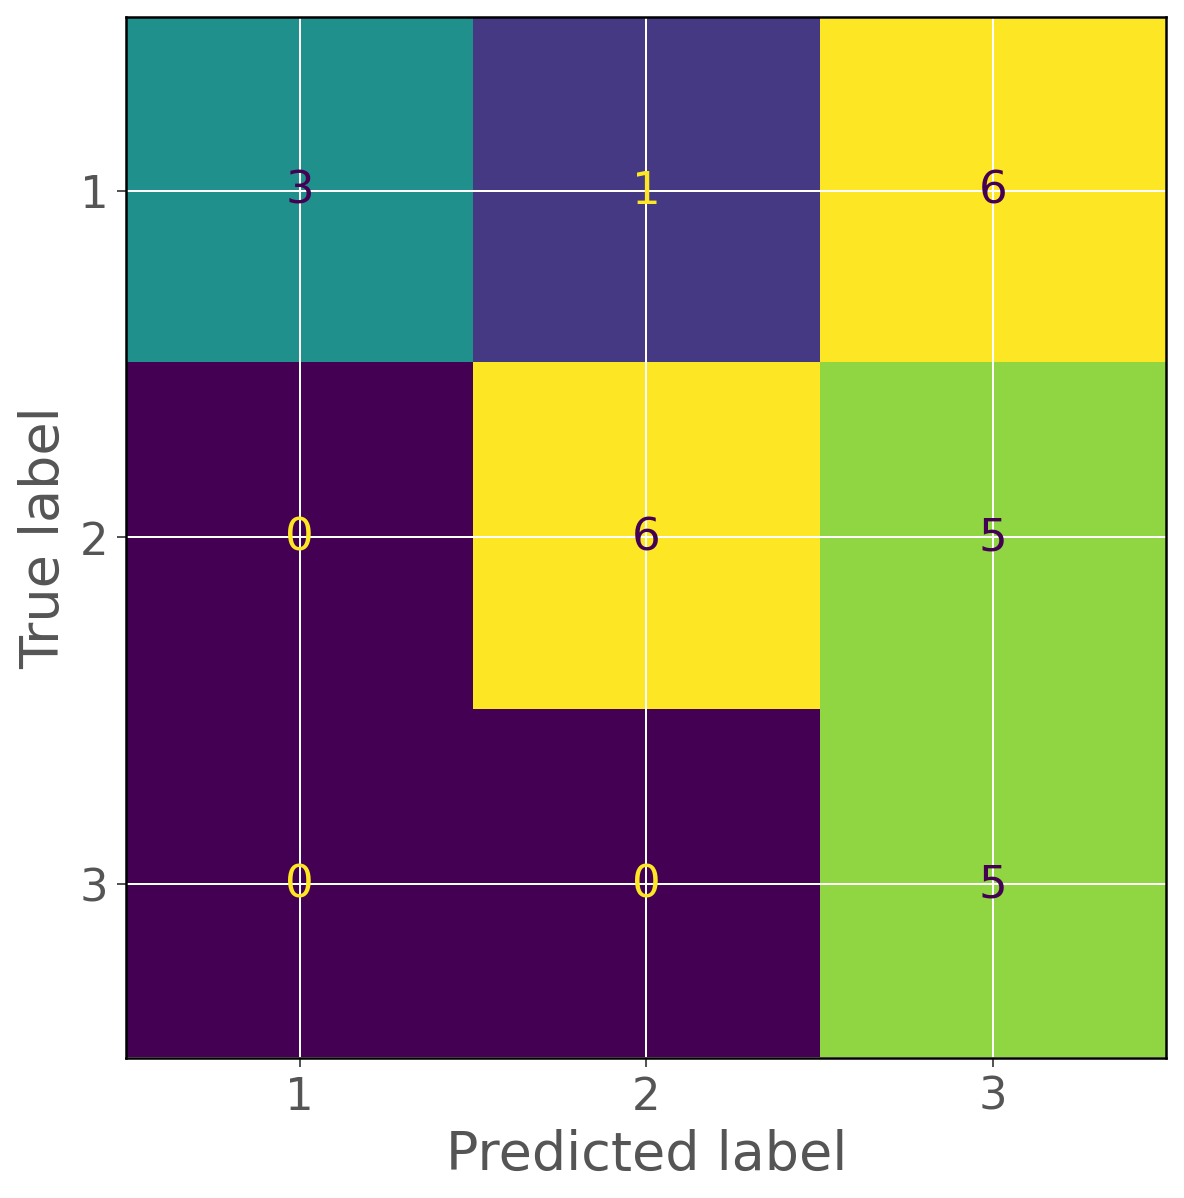

              precision    recall  f1-score   support

           1       1.00      0.30      0.46        10
           2       0.86      0.55      0.67        11
           3       0.31      1.00      0.48         5

    accuracy                           0.54        26
   macro avg       0.72      0.62      0.53        26
weighted avg       0.81      0.54      0.55        26



In [81]:
nets = [net_4_window, net_2_window]
dataframes = [df_members_4_window, df_members_2_window]
for year, idx in {2012: 0, 2016: 0, 2020: 0, 2022: 1}.items():
    # Gettind and preprocessing the data.
    data = get_data_researcher(nets[idx][year], dataframes[idx], year, 13)

    # Clustering the data.
    data.loc[:, "cluster"] = clustering_kmeans(data[data.columns.tolist()[4:]].copy(), 3)
    data["cluster"] += 1
    data["cluster"] = data["cluster"].astype("category")
    data["real_rl"] = data.complete_name.apply(lambda x: discretize_research_line(
        df_members.research_line[df_members.complete_name == x].iloc[0]))
    data["pred_rl"] = set_research_line_from_cluster(data[["num_paper", "cluster", "real_rl"]].copy(),
                                                     num_members_per_rl)

    # Showing the classification result.
    plot_confusion_matrix(data["real_rl"], data["pred_rl"])
    print(classification_report(data["real_rl"], data["pred_rl"]))

    # Generating the net for visualization of nodes and saving the data.
    generate_net_cluster(net_cumulative[2022],
        data[["id", "id_alt", "num_paper", "cluster", "pred_rl"]].copy(),
        name_file="../data/output/cluster_emb_{}.gexf".format(year))
    data.to_csv("../data/output/cluster_emb_{}.csv".format(year), quoting=csv.QUOTE_ALL, index=False)